# 1 - Import Libraries

In [2]:
#import lybraries
import pandas as pd
import numpy as np

#Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation coefficients
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import RobustScaler

from math import ceil

import scipy.stats as stats

import statsmodels.formula.api as smf
# Stats Model for OLS
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# 2 - Import Data

In [3]:
#pop_EU = pd.read_excel(r'/Users/marcosoliveira/OneDrive - NOVAIMS/Estatística para Ciência de Dados/Project/Statistics Poster Data/Habitants in EURO.xls')
#mig = pd.read_excel(r'/Users/marcosoliveira/OneDrive - NOVAIMS/Estatística para Ciência de Dados/Project/Statistics Poster Data/Migrants_2008_2019.xlsx', sheet_name=2)
#seats_2009 = pd.read_excel(r'/Users/marcosoliveira/OneDrive - NOVAIMS/Estatística para Ciência de Dados/Project/Statistics Poster Data/european union 2009-2014.xlsx')
#seats_2014 = pd.read_excel(r'/Users/marcosoliveira/OneDrive - NOVAIMS/Estatística para Ciência de Dados/Project/Statistics Poster Data/Seats_Group_2014_2019.xlsx')
#seats_2019 = pd.read_excel(r'/Users/marcosoliveira/OneDrive - NOVAIMS/Estatística para Ciência de Dados/Project/Statistics Poster Data/Seats_Group_2019_2024.xlsx')

pop_EU = pd.read_excel("Habitants in EURO.xls")
mig = pd.read_excel("migration europe.xlsx")
seats_2009 = pd.read_excel("european union 2009-2014.xlsx")
seats_2014 = pd.read_excel("Seats by political group and country 2014 - 2019 Constitutive session.xlsx")
seats_2019 = pd.read_excel("Seats by political group and country 2019-2024.xlsx")

In [4]:
# Defining the Country label as index and sorting it

mig.set_index("Country", inplace=True)

In [5]:
# Removing UK and removing the years 2008 and 2019


mig = mig.iloc[:-1,1:-1]

In [6]:
# Sorting the index
mig = mig.sort_index()

In [7]:
mig.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Austria,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633
Belgium,:,135281,147377,129477,120078,123158,146626,123702,126703,137860
Bulgaria,:,:,:,14103,18570,26615,25223,21241,25597,29559
Croatia,13213,8846,8534,8959,10378,10638,11706,13985,15553,26029
Cyprus,22581,20206,23037,17476,13149,9212,15183,17391,21306,23442


## 3.1 - Immigration numbers per year per country in the European Union since 2008 until 2010

In [8]:
# Replace strings ":" as 0

mig["2009"] = mig["2009"].replace(":", 0)
mig["2010"] = mig["2010"].replace(":", 0)
mig["2011"] = mig["2011"].replace(":", 0)

<AxesSubplot:title={'center':'Number of Immigrantes by European Union Country From 2008 to 2018'}>

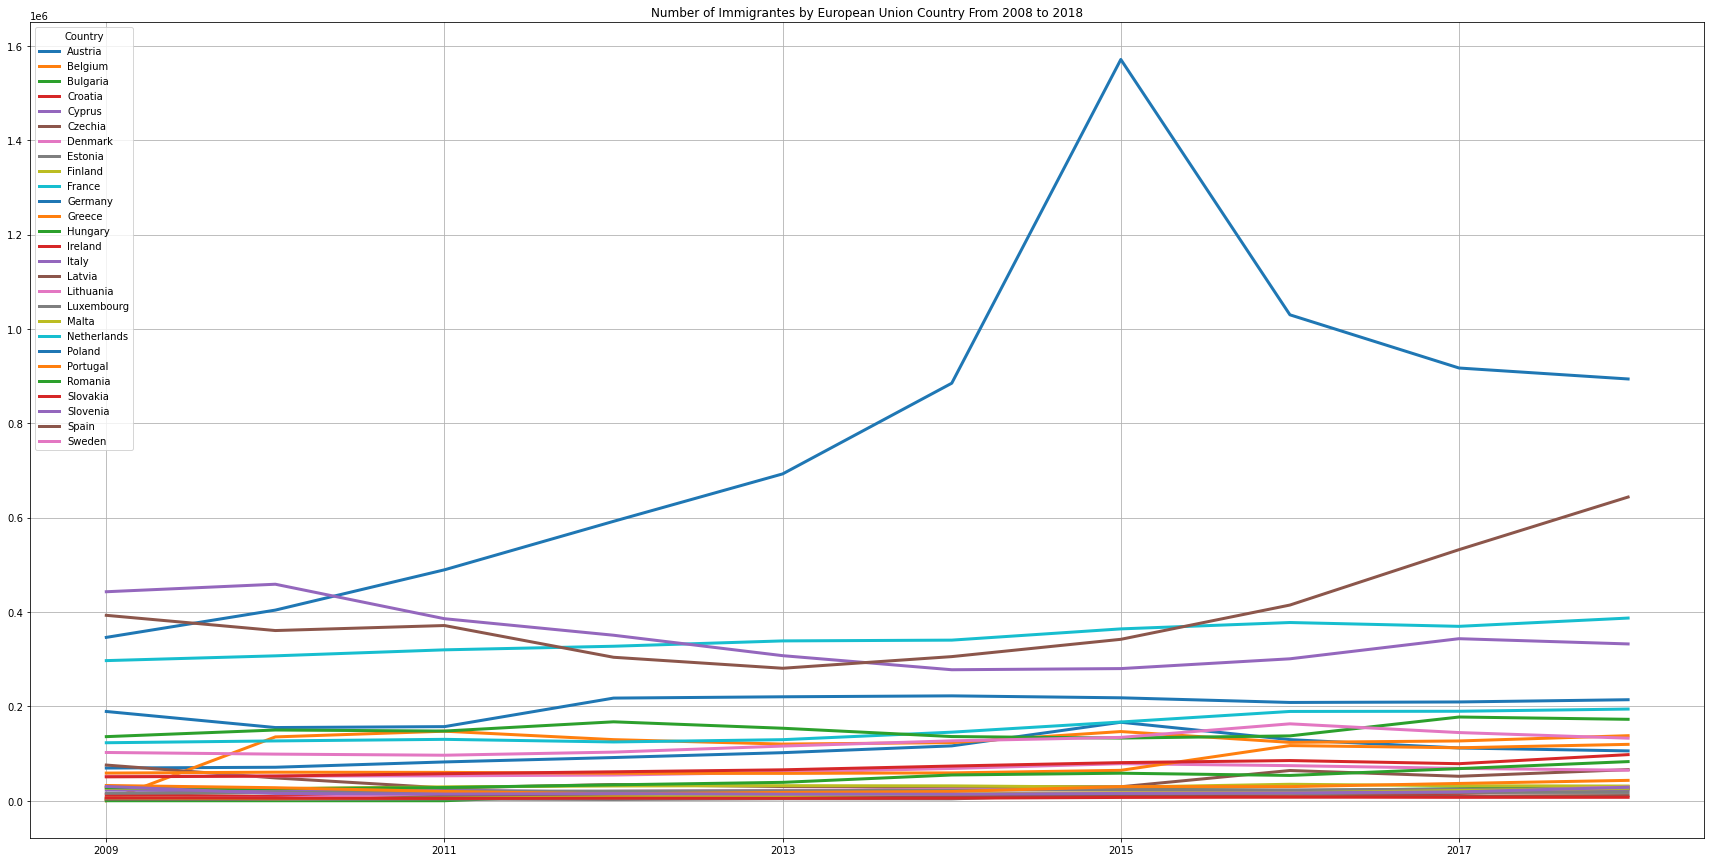

In [9]:
# Transposing original dataset and plot (lineplot) the number of immigrantes per country from 2008 to 2019

mig2 = mig.T
mig2.plot.line(figsize=(30,15), 
               title='Number of Immigrantes by European Union Country From 2008 to 2018',
               grid=True,lw=3)
#plt.yticks([1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6])



## 3.2 - Cummulative Immigration numbers per year per country in the European Union since 2008 until 2019

In [10]:
# Create cummulative summing of the immigration numbers in each country

mig_CS = mig.cumsum(skipna=True, axis=1)

<AxesSubplot:title={'center':'Cummulative Number of Immigrantes by European Union Country Since 2009 till 2018'}>

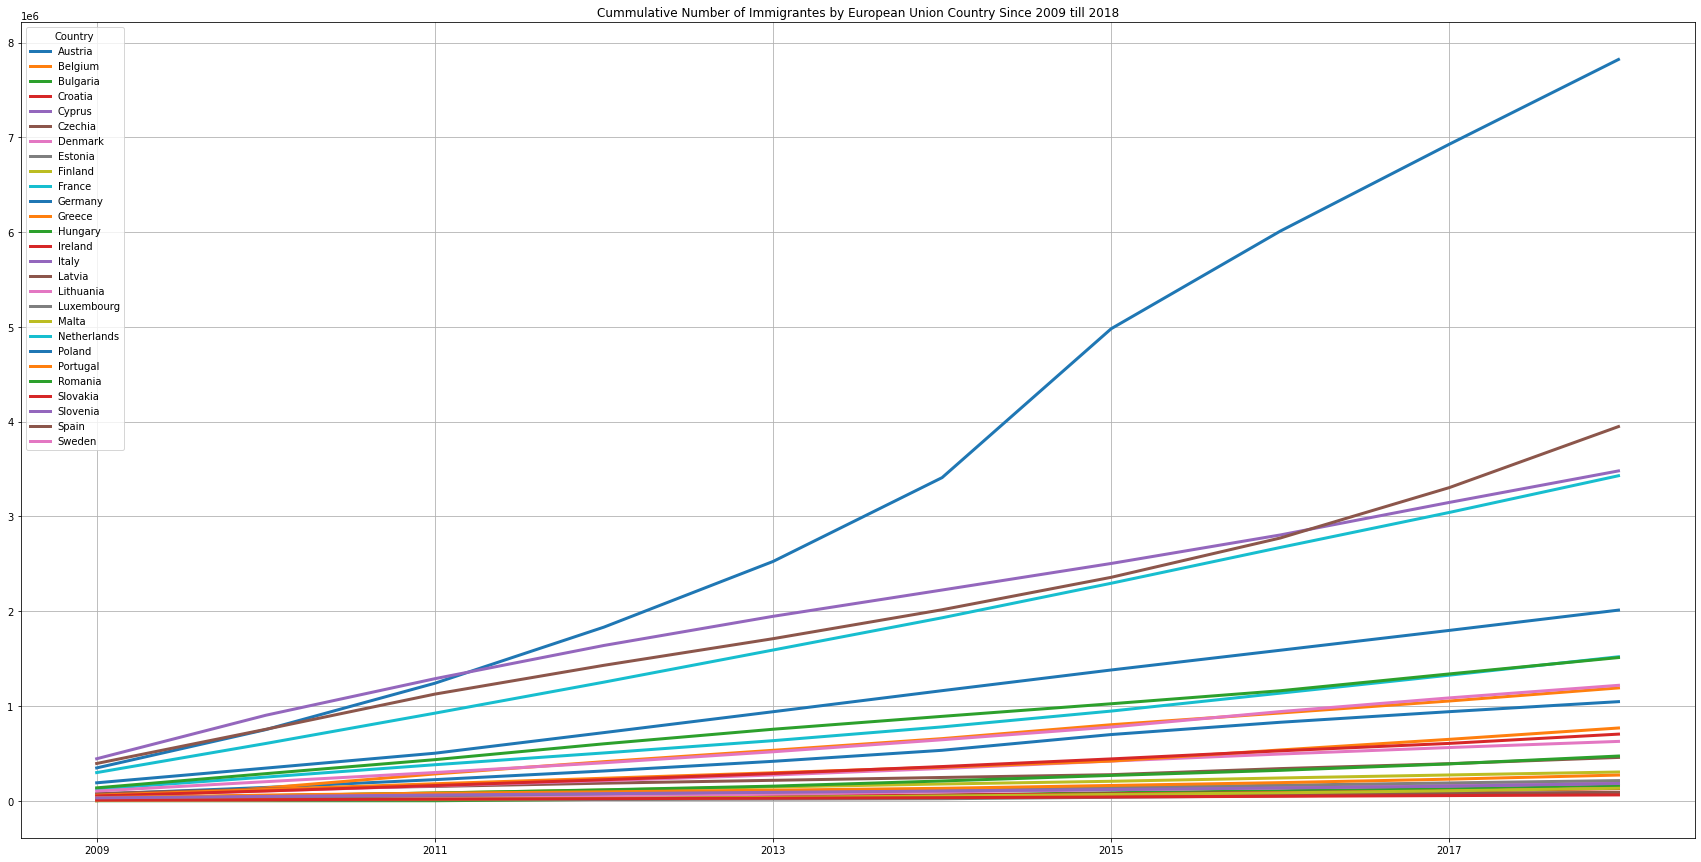

In [11]:
# Transpose for line plotting

mig_CS_T = mig_CS.T

# Plotting

mig_CS_T.plot.line(figsize=(30,15), 
               title='Cummulative Number of Immigrantes by European Union Country Since 2009 till 2018',
               grid=True,lw=3)

## 3.3 - Yearly number of immigrants per 100.000 habitants in the European Union Countries since 2010

In [12]:
# Removing UK and the year 2019

pop_EU = pop_EU.iloc[:-1,:-1]

In [13]:
# Defining the Country label as index and sorting it


pop_EU = pop_EU.set_index("Country",drop=True)
pop_EU = pop_EU.sort_index()

In [14]:
pop_EU.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Austria,8335003,8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267
Belgium,10414336,10839905,11000638,11075889,11137974,11180840,11237274,11311117,11351727,11398589
Bulgaria,7204687,7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034
Croatia,4489409,4302847,4289857,4275984,4262140,4246809,4225316,4190669,4154213,4105493
Cyprus,796740,819140,839751,862011,865878,858000,847008,848319,854802,864236


#### Formula:  Multiply the number of imigrantes in a given Year * the PopSize and then multiply per 100.000

In [15]:
mig

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Austria,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633
Belgium,0,135281,147377,129477,120078,123158,146626,123702,126703,137860
Bulgaria,0,0,0,14103,18570,26615,25223,21241,25597,29559
Croatia,13213,8846,8534,8959,10378,10638,11706,13985,15553,26029
Cyprus,22581,20206,23037,17476,13149,9212,15183,17391,21306,23442
Czechia,75620,48317,27114,34337,30124,29897,29602,64083,51847,65910
Denmark,51800,52236,52833,54409,60312,68388,78492,74383,68579,64669
Estonia,3884,2810,3709,2639,4109,3904,15413,14822,17616,17547
Finland,26699,25636,29481,31278,31941,31507,28746,34905,31797,31106


In [16]:
# Dropping the UK and EU fro pop_EU
#pop_EU = pop_EU.drop(['European Union - 27 countries (from 2020)'], axis=0)

In [17]:
mig

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Austria,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633
Belgium,0,135281,147377,129477,120078,123158,146626,123702,126703,137860
Bulgaria,0,0,0,14103,18570,26615,25223,21241,25597,29559
Croatia,13213,8846,8534,8959,10378,10638,11706,13985,15553,26029
Cyprus,22581,20206,23037,17476,13149,9212,15183,17391,21306,23442
Czechia,75620,48317,27114,34337,30124,29897,29602,64083,51847,65910
Denmark,51800,52236,52833,54409,60312,68388,78492,74383,68579,64669
Estonia,3884,2810,3709,2639,4109,3904,15413,14822,17616,17547
Finland,26699,25636,29481,31278,31941,31507,28746,34905,31797,31106


In [18]:
# checking Nan in the Pop and mig for Nan

mig.isna().sum(), pop_EU.isna().sum()

(2009    0
 2010    0
 2011    0
 2012    0
 2013    0
 2014    0
 2015    0
 2016    0
 2017    0
 2018    0
 dtype: int64,
 2009    0
 2010    0
 2011    0
 2012    0
 2013    0
 2014    0
 2015    0
 2016    0
 2017    0
 2018    0
 dtype: int64)

In [19]:
# Dividing the Migration dataset (mig_2010)
mig_per_habitant = mig.values /pop_EU * 100_000

In [20]:
mig_per_habitant

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Austria,831.373426,849.868702,981.831520,1088.911542,1205.249495,1366.536488,1937.384201,1488.528610,1274.395537,1197.345308
Belgium,0.000000,1247.990642,1339.713206,1168.998714,1078.095532,1101.509368,1304.818233,1093.632044,1116.156158,1209.447941
Bulgaria,0.000000,0.000000,0.000000,192.473985,254.923021,367.322474,350.212532,296.919784,360.426756,419.274574
Croatia,294.314909,205.584814,198.934370,209.519025,243.492706,250.493959,277.044368,333.717600,374.391010,634.004247
Cyprus,2834.174260,2466.733403,2743.313196,2027.352319,1518.574210,1073.659674,1792.545053,2050.054284,2492.507037,2712.453543
Czechia,740.508332,461.829417,258.555311,326.849553,286.455325,284.396959,280.899863,607.200619,490.101921,621.203189
Denmark,941.730858,943.784512,950.126497,974.981525,1076.494816,1215.303786,1386.854285,1303.306969,1192.933652,1118.610528
Estonia,291.309468,210.756850,278.943489,199.137198,311.246851,296.697342,1172.207138,1126.339723,1338.973195,1330.191876
Finland,501.265979,479.049794,548.455558,579.086351,588.592571,577.975408,525.352661,636.104261,577.780919,564.216697


<AxesSubplot:title={'center':'number of immigrantes per 100.000 habitants per Year per European Union Country'}>

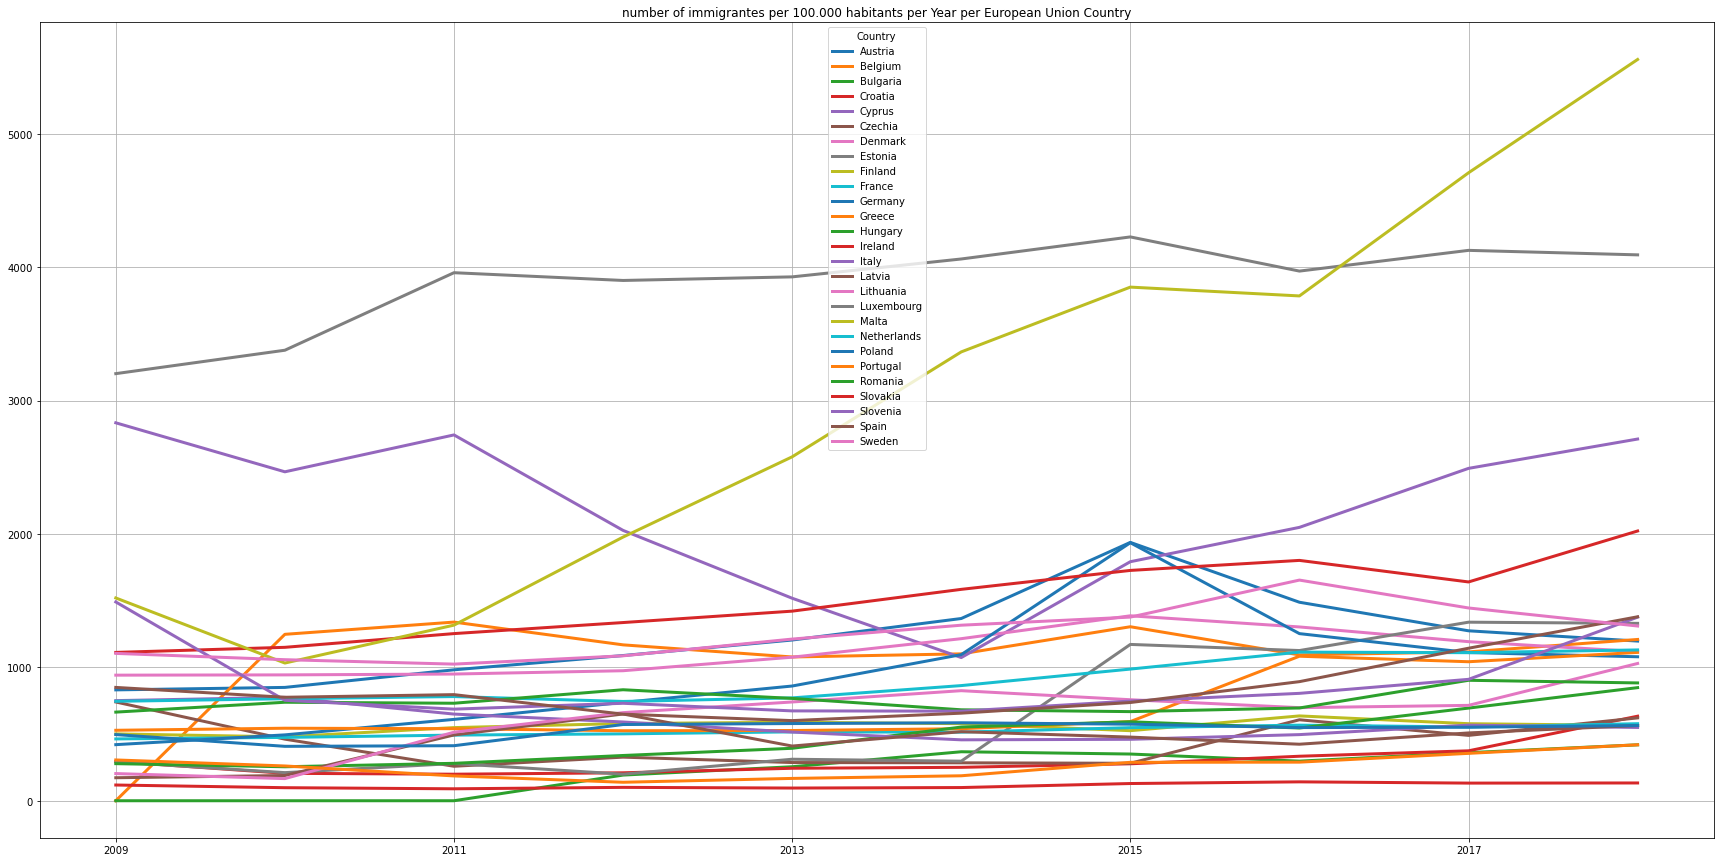

In [21]:
# Plotting the Migration number per 100.000 habitants

mig_per_habitant_T = mig_per_habitant.T
mig_per_habitant_T.plot.line(figsize=(30,15), 
               title='number of immigrantes per 100.000 habitants per Year per European Union Country',
               grid=True,lw=3)

# 4 - Election Seats Analysis

## 4.1 -  2009 Elections 
#### Elections hold in 2009 - corresponding to the period of 2009-2014

In [22]:
# Importing 2009 election dataset

seats_2009 = pd.read_excel("european union 2009-2014.xlsx")

seats_2009.head()

,Country,EPP,S&D,ALDE,Greens/EFA,ECR,GUE/NGL,EFD,NI,Number Seats
0,Austria,6.0,4,NaN,2.0,NaN,NaN,NaN,5.0,17
1,Belgium,5.0,5,5.0,4.0,1.0,NaN,NaN,2.0,22
2,Bulgaria,6.0,4,5.0,NaN,NaN,NaN,NaN,2.0,17
3,Croatia,5.0,5,NaN,NaN,1.0,1.0,NaN,NaN,12
4,Cyprus,2.0,2,NaN,NaN,NaN,2.0,NaN,2.0,6


In [23]:
# Removing European Union and UK 

#seats_2009 = seats_2009.iloc[:-2,:]

In [24]:
# Setting Country as index

seats_2009 = seats_2009.set_index("Country",drop=True)

In [25]:
# Fill Nan with zeros

seats_2009 = seats_2009.fillna(0)


In [26]:
seats_2009.head()

,EPP,S&D,ALDE,Greens/EFA,ECR,GUE/NGL,EFD,NI,Number Seats
Country,,,,,,,,,
Austria,6.0,4,0.0,2.0,0.0,0.0,0.0,5.0,17
Belgium,5.0,5,5.0,4.0,1.0,0.0,0.0,2.0,22
Bulgaria,6.0,4,5.0,0.0,0.0,0.0,0.0,2.0,17
Croatia,5.0,5,0.0,0.0,1.0,1.0,0.0,0.0,12
Cyprus,2.0,2,0.0,0.0,0.0,2.0,0.0,2.0,6


In [27]:
# Calculating the proportion for each column

seats_2009["EPP%"] = seats_2009["EPP"] / seats_2009["Number Seats"]
seats_2009["S&D%"] = seats_2009["S&D"] / seats_2009["Number Seats"]
seats_2009["ALDE%"] = seats_2009["ALDE"] / seats_2009["Number Seats"]
seats_2009["Greens/EFA%"] = seats_2009["Greens/EFA"] / seats_2009["Number Seats"]
seats_2009["ECR%"] = seats_2009["ECR"] / seats_2009["Number Seats"]
seats_2009["GUE/NGL%"] = seats_2009["GUE/NGL"] / seats_2009["Number Seats"]
seats_2009["EFD%"] = seats_2009["EFD"] / seats_2009["Number Seats"]
seats_2009["NI%"] = seats_2009["NI"] / seats_2009["Number Seats"]


In [28]:
# Subsetting for including number of seats and parties percentages
seats_2009_perc = seats_2009.iloc[:,8:].round(3)

In [29]:
seats_2009_perc.head()

,Number Seats,EPP%,S&D%,ALDE%,Greens/EFA%,ECR%,GUE/NGL%,EFD%,NI%
Country,,,,,,,,,
Austria,17,0.353,0.235,0.000,0.118,0.000,0.000,0.0,0.294
Belgium,22,0.227,0.227,0.227,0.182,0.045,0.000,0.0,0.091
Bulgaria,17,0.353,0.235,0.294,0.000,0.000,0.000,0.0,0.118
Croatia,12,0.417,0.417,0.000,0.000,0.083,0.083,0.0,0.000
Cyprus,6,0.333,0.333,0.000,0.000,0.000,0.333,0.0,0.333


## According with Wikipedia information
 **Source**: https://en.wikipedia.org/wiki/Political_groups_of_the_European_Parliament

- EPP - Right Center
- S&D - Center.left
- ALDE - Center
- Greens/EFA - Center-Left to Left Wing
- ECR - Right-wing to Far Right
- GUE/NGL - Left-wing to Far Left
- EFD - Right Wing to Far Right


**Far Right Party Group** - ECR and EFD

- ECR "Effectively controlled immigration and an end to abuse of asylum procedures" - Wikipedia

- "The EFD is hostile to further European integration,
[11] and more nationalistic and anti-immigration than its main predecessor IND/DEM" - Wikipedia


**Far Left** - GUE/NGL



In [30]:
# Coding Far_left and Far_right according with the information above

seats_2009_perc["Far_Right_2009%"] = seats_2009_perc["ECR%"] + seats_2009_perc["EFD%"]
seats_2009_perc["Far_Left_2009%"] = seats_2009_perc["GUE/NGL%"]

In [31]:
seats_2009_perc.head()

,Number Seats,EPP%,S&D%,ALDE%,Greens/EFA%,ECR%,GUE/NGL%,EFD%,NI%,Far_Right_2009%,Far_Left_2009%
Country,,,,,,,,,,,
Austria,17,0.353,0.235,0.000,0.118,0.000,0.000,0.0,0.294,0.000,0.000
Belgium,22,0.227,0.227,0.227,0.182,0.045,0.000,0.0,0.091,0.045,0.000
Bulgaria,17,0.353,0.235,0.294,0.000,0.000,0.000,0.0,0.118,0.000,0.000
Croatia,12,0.417,0.417,0.000,0.000,0.083,0.083,0.0,0.000,0.083,0.083
Cyprus,6,0.333,0.333,0.000,0.000,0.000,0.333,0.0,0.333,0.000,0.333


## 4.2 -  2014 Elections 
#### Elections hold in 2014 - corresponding to the period of 2014-2019

In [32]:
seats_2014 = pd.read_excel("Seats by political group and country 2014 - 2019 Constitutive session.xlsx")

# Head() inspection

seats_2014.head()

,Country,EPP,S&D,ECR,ALDE,GUE/ NGL,Greens,EFDD,NI,Number Seats
0,Austria,5.0,5,NaN,1.0,NaN,3.0,NaN,4.0,18
1,Belgium,4.0,4,4.0,6.0,NaN,2.0,NaN,1.0,21
2,Bulgaria,7.0,4,2.0,4.0,NaN,NaN,NaN,NaN,17
3,Croatia,5.0,2,1.0,2.0,NaN,1.0,NaN,NaN,11
4,Cyprus,2.0,2,NaN,NaN,2.0,NaN,NaN,NaN,6


In [33]:
## Removing the numeric index

seats_2014 = seats_2014.set_index("Country",drop=True)


In [34]:
# Removing Uk and European Union Label

#seats_2014 = seats_2014.iloc[:-2,:]

In [35]:

# Fill Nan with zeros

seats_2014 = seats_2014.fillna(0)


# Calculating the proportion for each column

seats_2014["EPP%"] = seats_2014["EPP"] / seats_2014["Number Seats"]
seats_2014["S&D%"] = seats_2014["S&D"] / seats_2014["Number Seats"]
seats_2014["ALDE%"] = seats_2014["ALDE"] / seats_2014["Number Seats"]
seats_2014["Greens%"] = seats_2014["Greens"] / seats_2014["Number Seats"]
seats_2014["ECR%"] = seats_2014["ECR"] / seats_2014["Number Seats"]
seats_2014["GUE/NGL%"] = seats_2014['GUE/ NGL'] / seats_2014["Number Seats"]
seats_2014["EFDD%"] = seats_2014["EFDD"] / seats_2014["Number Seats"]
seats_2014["NI%"] = seats_2014["NI"] / seats_2014["Number Seats"]

In [36]:
# Subsetting for including number of seats and parties percentages
seats_2014_perc = seats_2014.iloc[:,8:].round(3)

In [37]:
seats_2014_perc.head()


,Number Seats,EPP%,S&D%,ALDE%,Greens%,ECR%,GUE/NGL%,EFDD%,NI%
Country,,,,,,,,,
Austria,18,0.278,0.278,0.056,0.167,0.000,0.000,0.0,0.222
Belgium,21,0.190,0.190,0.286,0.095,0.190,0.000,0.0,0.048
Bulgaria,17,0.412,0.235,0.235,0.000,0.118,0.000,0.0,0.000
Croatia,11,0.455,0.182,0.182,0.091,0.091,0.000,0.0,0.000
Cyprus,6,0.333,0.333,0.000,0.000,0.000,0.333,0.0,0.000


## According with Wikipedia information
 **Source**: https://en.wikipedia.org/wiki/Political_groups_of_the_European_Parliament

- EPP - Right Center
- S&D - Center.left
- ALDE - Center
- Greens/EFA - Center-Left to Left Wing
- ECR - Right-wing to Far Right
- GUE/NGL - Left-wing to Far Left
- EFDD - Right Wing to far right


**Far Right Party Group** - ECR and EFDD 

- ECR "Effectively controlled immigration and an end to abuse of asylum procedures" - Wikipedia



**Far Left** - GUE/NGL


In [38]:
# Coding Far_left and Far_right according with the information above

seats_2014_perc["Far_Right_2014%"] = seats_2014_perc["ECR%"] + seats_2014_perc["EFDD%"]
seats_2014_perc["Far_Left_2014%"] = seats_2014_perc["GUE/NGL%"]

In [39]:
seats_2014_perc.head()

,Number Seats,EPP%,S&D%,ALDE%,Greens%,ECR%,GUE/NGL%,EFDD%,NI%,Far_Right_2014%,Far_Left_2014%
Country,,,,,,,,,,,
Austria,18,0.278,0.278,0.056,0.167,0.000,0.000,0.0,0.222,0.000,0.000
Belgium,21,0.190,0.190,0.286,0.095,0.190,0.000,0.0,0.048,0.190,0.000
Bulgaria,17,0.412,0.235,0.235,0.000,0.118,0.000,0.0,0.000,0.118,0.000
Croatia,11,0.455,0.182,0.182,0.091,0.091,0.000,0.0,0.000,0.091,0.000
Cyprus,6,0.333,0.333,0.000,0.000,0.000,0.333,0.0,0.000,0.000,0.333


## 4.3 -  2019 Elections 
#### Elections hold in 2019 - corresponding to the period of 2019-2024

In [40]:
# Loading 2019 seats dataset

seats_2019 = pd.read_excel("Seats by political group and country 2019-2024.xlsx")

In [41]:
# Head() inspection

seats_2019.head()

,Country,EPP,S&D,ECR,Renew Europe,GUE/ NGL,Greens,ID,NI,Number Seats
0,Austria,7.0,5.0,NaN,1.0,NaN,2.0,3.0,NaN,18
1,Belgium,4.0,3.0,3.0,4.0,1.0,3.0,3.0,NaN,21
2,Bulgaria,7.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,17
3,Croatia,4.0,3.0,1.0,1.0,NaN,NaN,NaN,2.0,11
4,Cyprus,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,6


In [42]:
## Removing the numeric index

seats_2019 = seats_2019.set_index("Country",drop=True)


In [43]:
#seats_2019 = seats_2019.iloc[:-2,:]

In [44]:
# Fill Nan with zeros

seats_2019 = seats_2019.fillna(0)


# Calculating the proportion for each column

seats_2019["EPP%"] = seats_2019["EPP"] / seats_2019["Number Seats"]
seats_2019["S&D%"] = seats_2019["S&D"] / seats_2019["Number Seats"]
seats_2019['Renew Europe%'] = seats_2019['Renew Europe'] / seats_2019["Number Seats"]
seats_2019["Greens%"] = seats_2019["Greens"] / seats_2019["Number Seats"]
seats_2019["ECR%"] = seats_2019["ECR"] / seats_2019["Number Seats"]
seats_2019["GUE/NGL%"] = seats_2019['GUE/ NGL'] / seats_2019["Number Seats"]
seats_2019["ID%"] = seats_2019["ID"] / seats_2019["Number Seats"]
seats_2019["NI%"] = seats_2019["NI"] / seats_2019["Number Seats"]

In [45]:
# Subsetting for including number of seats and parties percentages
seats_2019_perc = seats_2019.iloc[:,8:].round(3)

In [46]:
seats_2019_perc.head()

,Number Seats,EPP%,S&D%,Renew Europe%,Greens%,ECR%,GUE/NGL%,ID%,NI%
Country,,,,,,,,,
Austria,18,0.389,0.278,0.056,0.111,0.000,0.000,0.167,0.000
Belgium,21,0.190,0.143,0.190,0.143,0.143,0.048,0.143,0.000
Bulgaria,17,0.412,0.294,0.176,0.000,0.118,0.000,0.000,0.000
Croatia,11,0.364,0.273,0.091,0.000,0.091,0.000,0.000,0.182
Cyprus,6,0.333,0.333,0.000,0.000,0.000,0.333,0.000,0.000


## According with Wikipedia information
 **Source**: https://en.wikipedia.org/wiki/Political_groups_of_the_European_Parliament

- EPP - Right Center
- S&D - Center - left
- Renew Europe - Center
- Greens/EFA - Center-Left to Left Wing
- ID - Right-wing to far-right
- ECR - Right-wing with far-right factions
- GUE/NGL - Left-wing to Far Left


**Far Right Party Group** - ECR and ID 

- ECR "Effectively **controlled immigration and an end to abuse of asylum procedures**" - Wikipedia

- ID "The group lists its core priorities as protecting European cultural heritage and the sovereignty of European nations, creating jobs and growth, **increasing security, stopping illegal immigration, regulating legal immigration**, fighting EU bureaucracy and **preventing** what it describes as the **potential Islamisation of Europe**." Wikipedia


**Far Left** - GUE/NGL


In [47]:
# Coding Far_left and Far_right according with the information above

seats_2019_perc["Far_Right_2019%"] = seats_2019_perc["ECR%"] + seats_2019_perc["ID%"]
seats_2019_perc["Far_Left_2019%"] = seats_2019_perc["GUE/NGL%"]

In [48]:
seats_2019_perc.head()

,Number Seats,EPP%,S&D%,Renew Europe%,Greens%,ECR%,GUE/NGL%,ID%,NI%,Far_Right_2019%,Far_Left_2019%
Country,,,,,,,,,,,
Austria,18,0.389,0.278,0.056,0.111,0.000,0.000,0.167,0.000,0.167,0.000
Belgium,21,0.190,0.143,0.190,0.143,0.143,0.048,0.143,0.000,0.286,0.048
Bulgaria,17,0.412,0.294,0.176,0.000,0.118,0.000,0.000,0.000,0.118,0.000
Croatia,11,0.364,0.273,0.091,0.000,0.091,0.000,0.000,0.182,0.091,0.000
Cyprus,6,0.333,0.333,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.333


### Final Dataframe with Percentages from Far Right and Far Left

In [49]:
# Creating Final Dataframe with percentage of Far Right and Far Left from previous tables

final_df = pd.DataFrame(index=seats_2019_perc.index)

In [50]:
# Creating Final Dataframe with percentage of Far Right and Far Left from previous tables
final_df["Far_Right_2009%"] = seats_2009_perc["Far_Right_2009%"]
final_df["Far_Right_2014%"] = seats_2014_perc["Far_Right_2014%"]
final_df["Far_Right_2019%"] = seats_2019_perc["Far_Right_2019%"]
final_df["Far_Left_2009%"] = seats_2009_perc["Far_Left_2009%"]
final_df["Far_Left_2014%"] = seats_2014_perc["Far_Left_2014%"]
final_df["Far_Left_2019%"] = seats_2019_perc["Far_Left_2019%"]

final_df.head()

,Far_Right_2009%,Far_Right_2014%,Far_Right_2019%,Far_Left_2009%,Far_Left_2014%,Far_Left_2019%
Country,,,,,,
Austria,0.000,0.000,0.167,0.000,0.000,0.000
Belgium,0.045,0.190,0.286,0.000,0.000,0.048
Bulgaria,0.000,0.118,0.118,0.000,0.000,0.000
Croatia,0.083,0.091,0.091,0.083,0.000,0.000
Cyprus,0.000,0.000,0.000,0.333,0.333,0.333


In [51]:
#### Create Difference percentages from previous Election

final_df["Far_Right_Diff_09-14%"] = final_df["Far_Right_2014%"] - final_df["Far_Right_2009%"]
final_df["Far_Right_Diff_14-19%"] = final_df["Far_Right_2019%"] - final_df["Far_Right_2014%"]
final_df["Far_Left_Diff_09-14%"] = final_df["Far_Left_2014%"] - final_df["Far_Left_2009%"]
final_df["Far_Left_Diff_14-19%"] = final_df["Far_Left_2019%"] - final_df["Far_Left_2014%"]

In [52]:
final_df.head()

,Far_Right_2009%,Far_Right_2014%,Far_Right_2019%,Far_Left_2009%,Far_Left_2014%,Far_Left_2019%,Far_Right_Diff_09-14%,Far_Right_Diff_14-19%,Far_Left_Diff_09-14%,Far_Left_Diff_14-19%
Country,,,,,,,,,,
Austria,0.000,0.000,0.167,0.000,0.000,0.000,0.000,0.167,0.000,0.000
Belgium,0.045,0.190,0.286,0.000,0.000,0.048,0.145,0.096,0.000,0.048
Bulgaria,0.000,0.118,0.118,0.000,0.000,0.000,0.118,0.000,0.000,0.000
Croatia,0.083,0.091,0.091,0.083,0.000,0.000,0.008,0.000,-0.083,0.000
Cyprus,0.000,0.000,0.000,0.333,0.333,0.333,0.000,0.000,0.000,0.000


# 5 - Election Seats Graphical Analysis Analysis

### 5.1 - Comparing Far right votes percentages in 3 consecutive elections

#### 5.1.1 - LinePlot - Voting percentage evolution on 3 consecutive elections

In [53]:
final_df.iloc[:,:3]

,Far_Right_2009%,Far_Right_2014%,Far_Right_2019%
Country,,,
Austria,0.000,0.000,0.167
Belgium,0.045,0.190,0.286
Bulgaria,0.000,0.118,0.118
Croatia,0.083,0.091,0.091
Cyprus,0.000,0.000,0.000
Czechia,0.409,0.143,0.285
Denmark,0.154,0.308,0.077
Estonia,0.000,0.000,0.167
Finland,0.077,0.154,0.154


Text(0.5, 1.0, 'Far Right voting percentage evolution on 3 consecutive elections: 2009,2014 and 2019')

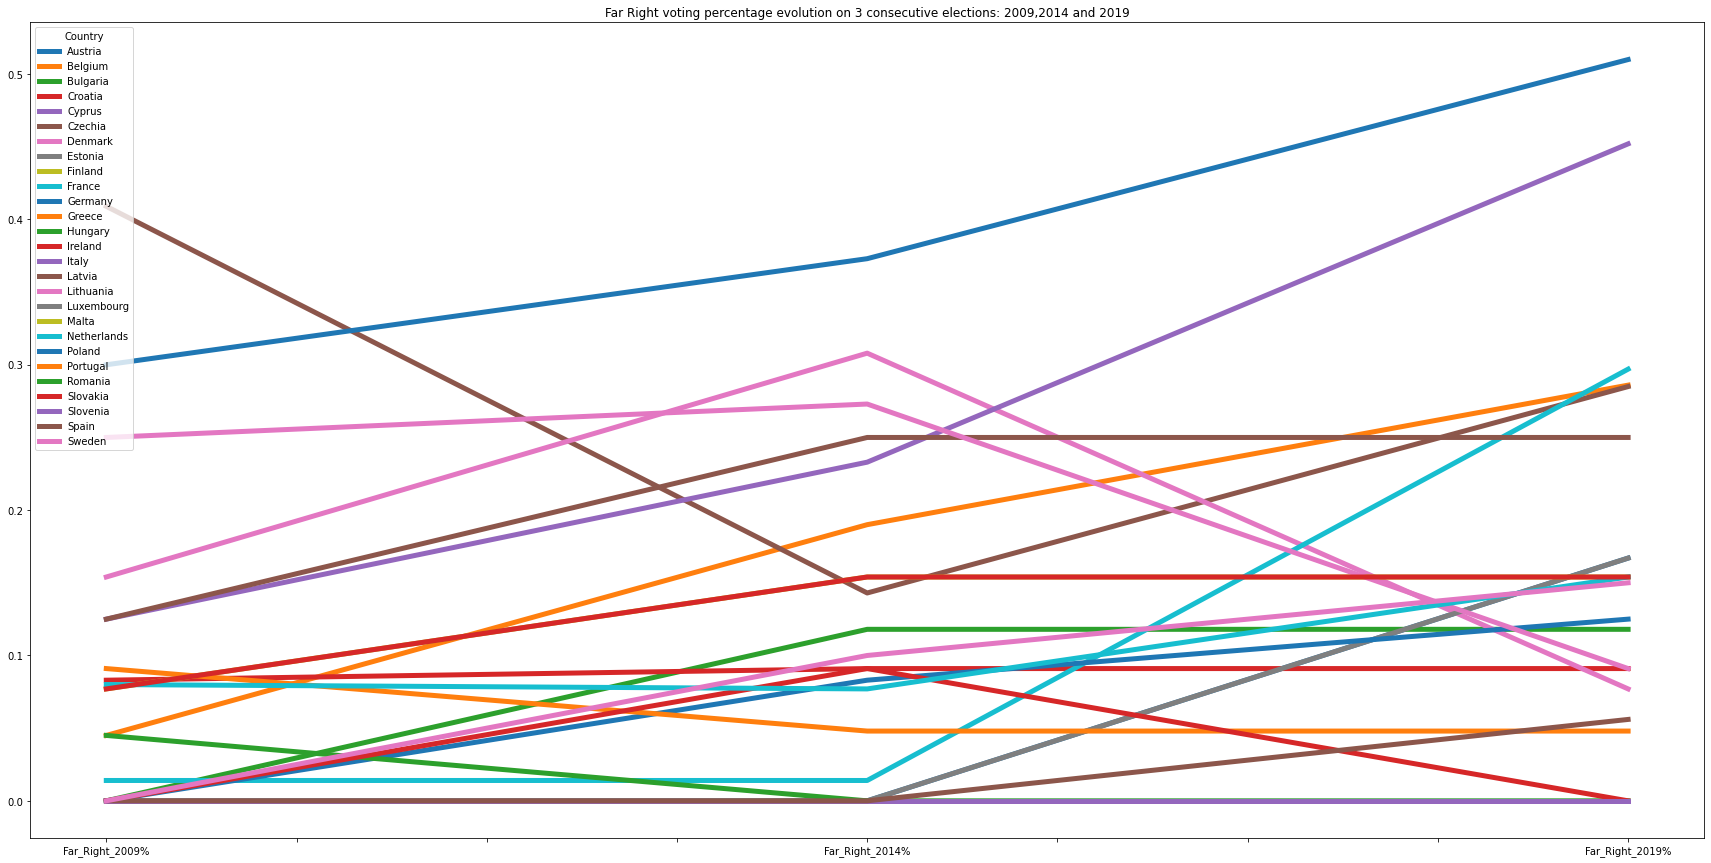

In [54]:
final_df.iloc[:-2,:3].T.plot.line(figsize=(30,15),lw=5)
plt.title("Far Right voting percentage evolution on 3 consecutive elections: 2009,2014 and 2019")

#### 5.1.2 - Barplot - Total Percentage of Far Right Voting on 3 consecutive elections

([<matplotlib.axis.YTick at 0x7fee859c8100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

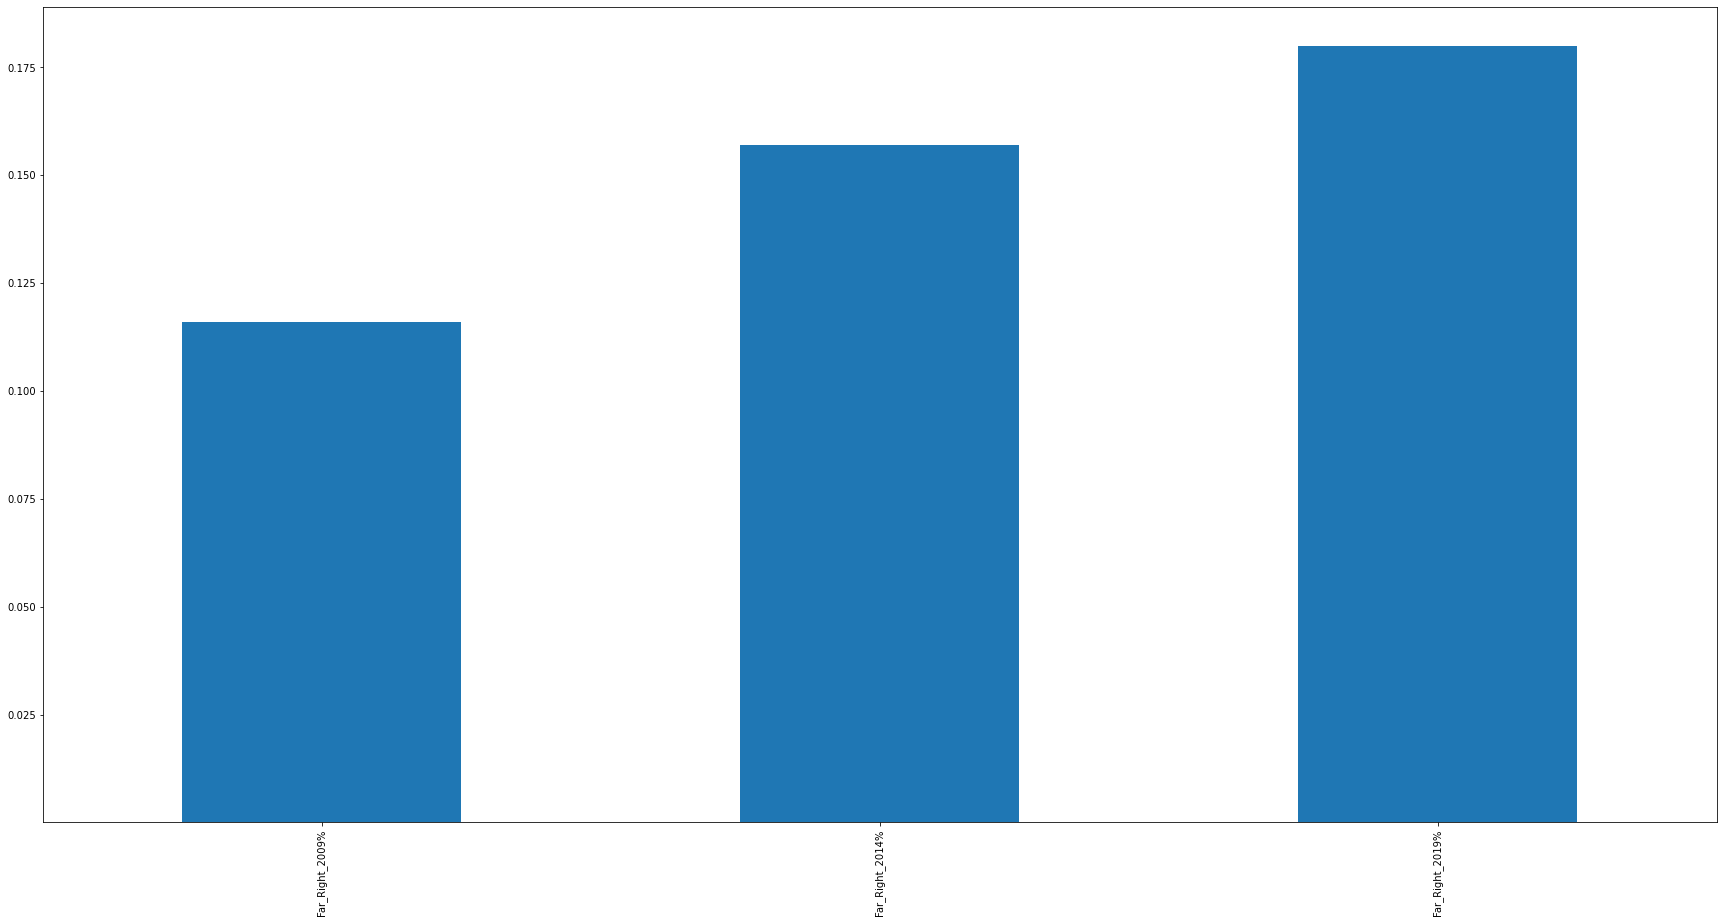

In [55]:
final_df.iloc[-1,:3].plot.bar(figsize=(30,15),lw=5)
plt.yticks([0.025,0.05,0.075,0.1,0.125,0.15,0.175])

### 5.2 - Comparing Far Left votes percentages in 3 consecutive elections

#### 5.2.1 - LinePlot - Voting percentage evolution on 3 consecutive elections

Text(0.5, 1.0, 'Far Left voting percentage evolution on 3 consecutive elections: 2009,2014 and 2019')

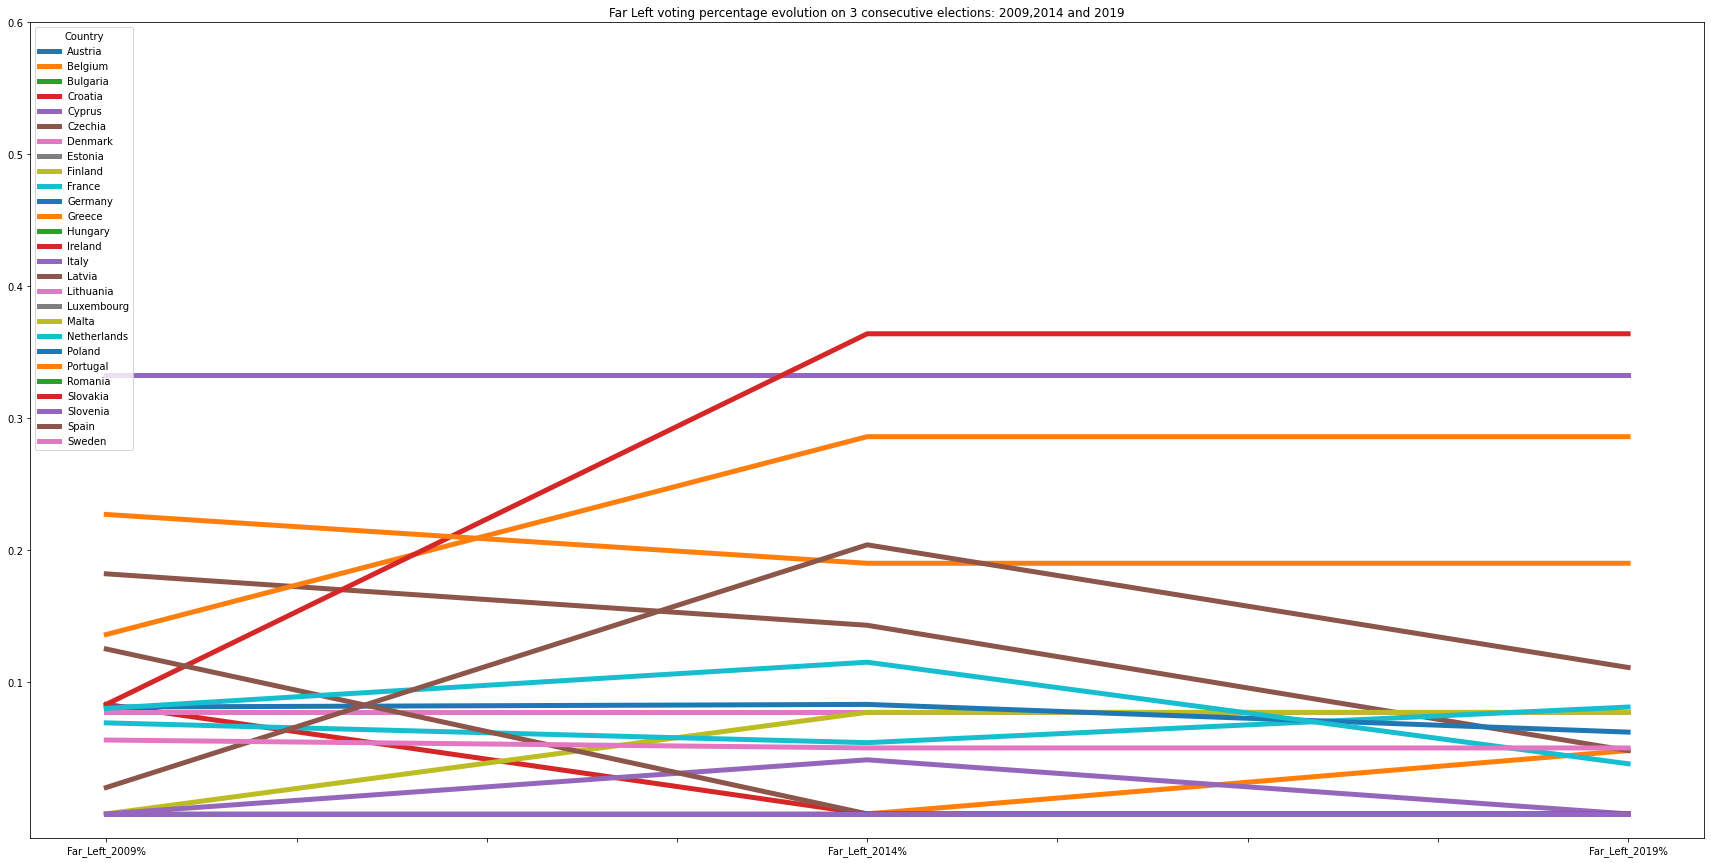

In [56]:
final_df.iloc[:-2,3:6].T.plot.line(figsize=(30,15),lw=5)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6])
plt.title("Far Left voting percentage evolution on 3 consecutive elections: 2009,2014 and 2019")

#### 5.1.2 - Barplot - Total Percentage of Far Left Voting on 3 consecutive elections

([<matplotlib.axis.YTick at 0x7fee8f79ccd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

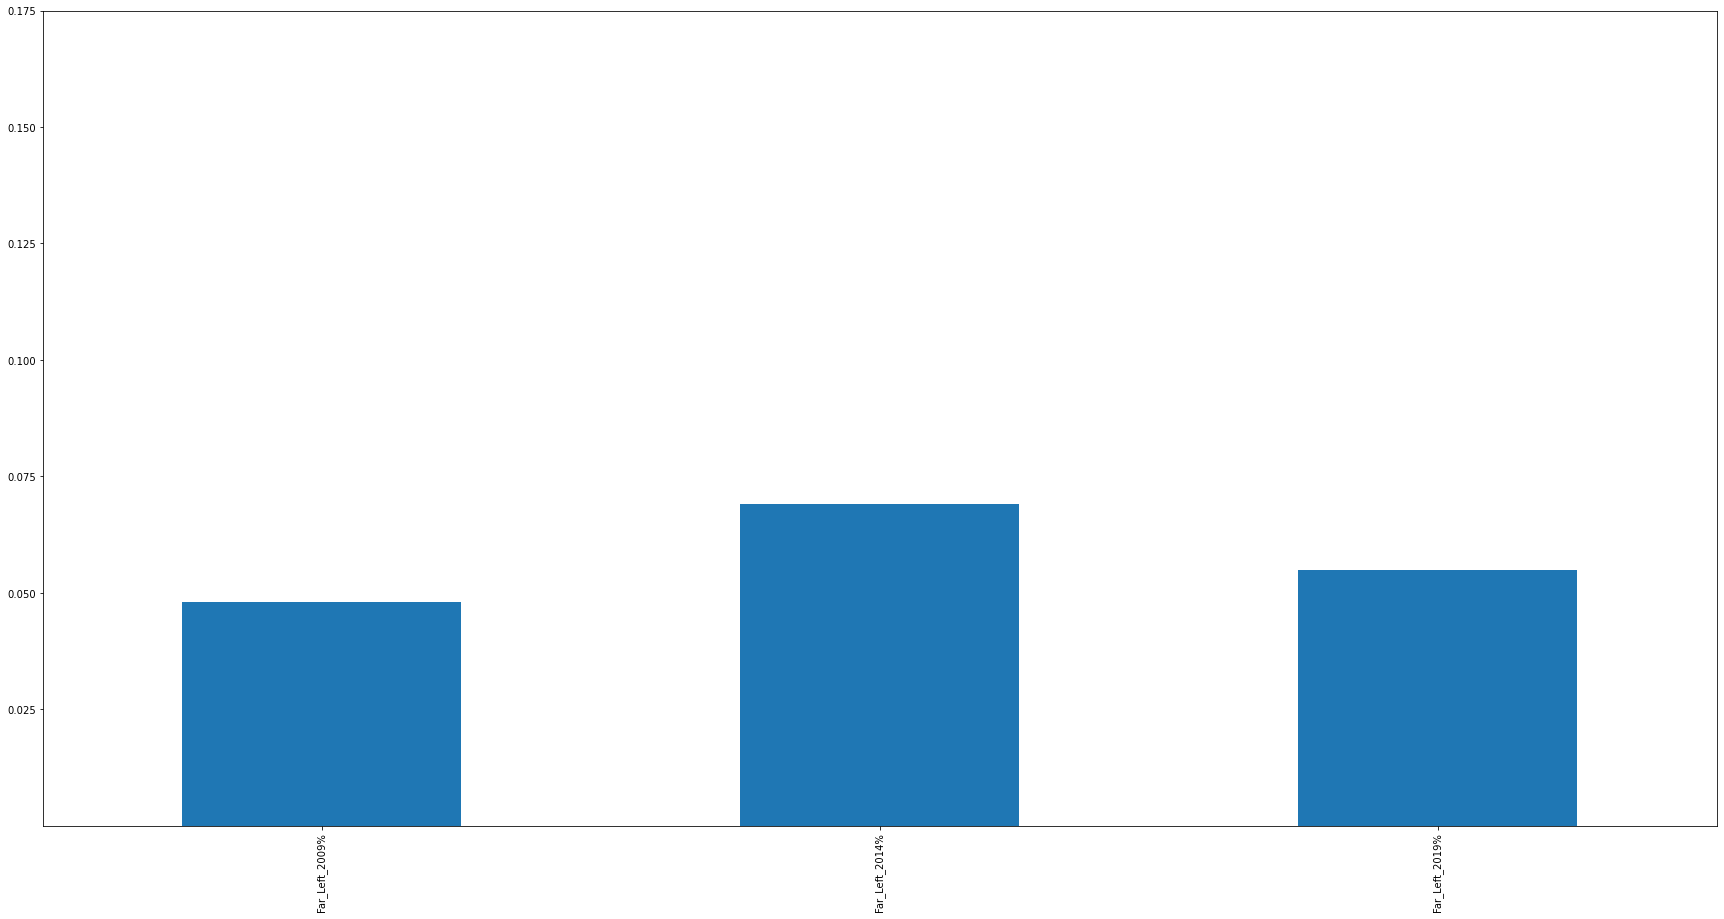

In [57]:
final_df.iloc[-1,3:6].plot.bar(figsize=(30,15),lw=5)
plt.yticks([0.025,0.05,0.075,0.1,0.125,0.15,0.175])

### 5.3 - Graphical Analysis of Difference in Far Right Voting from 2009 to 2014

Text(0.5, 1.0, 'Far_Right_Diff_09-14% VS Far_Left_Diff_09-14%')

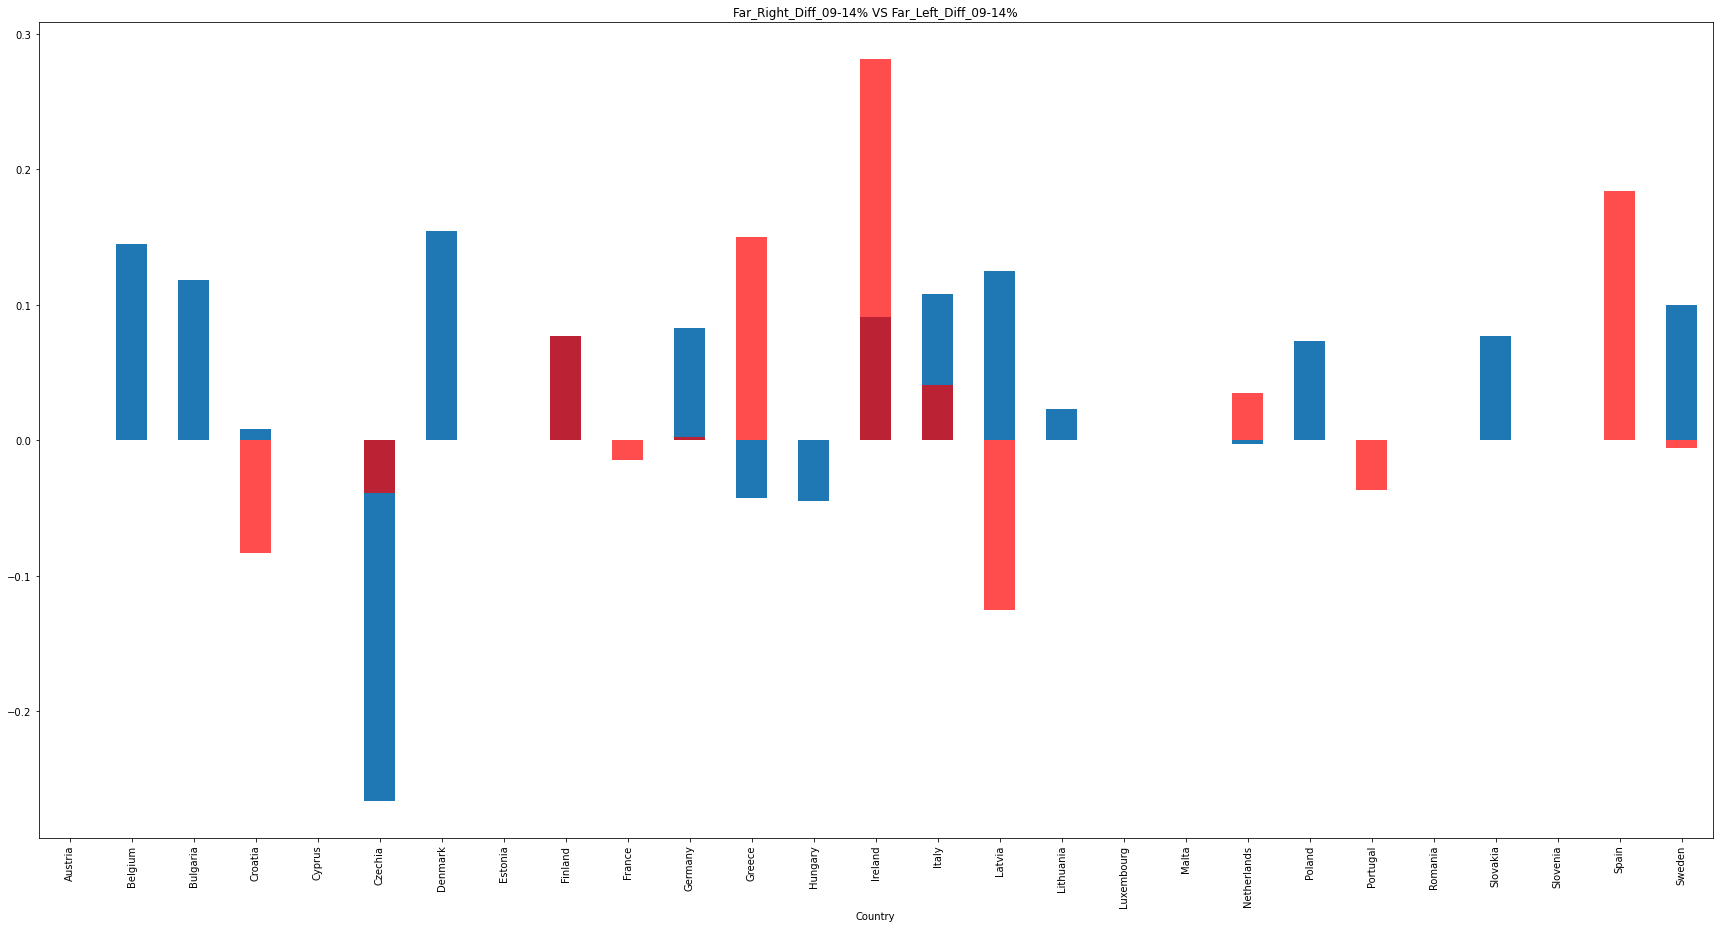

In [58]:
final_df["Far_Right_Diff_09-14%"].iloc[:-2].T.plot.bar(figsize=(30,15),lw=5)
final_df["Far_Left_Diff_09-14%"].iloc[:-2].T.plot.bar(figsize=(30,15),lw=5,color="red",alpha=0.7)
plt.title("Far_Right_Diff_09-14% VS Far_Left_Diff_09-14%")



### 5.4 - Graphical Analysis of Difference in Far Right Voting from 2014 to 2019

Text(0.5, 1.0, 'Far_Right_Diff_14-19% VS Far_Left_Diff_14-19%')

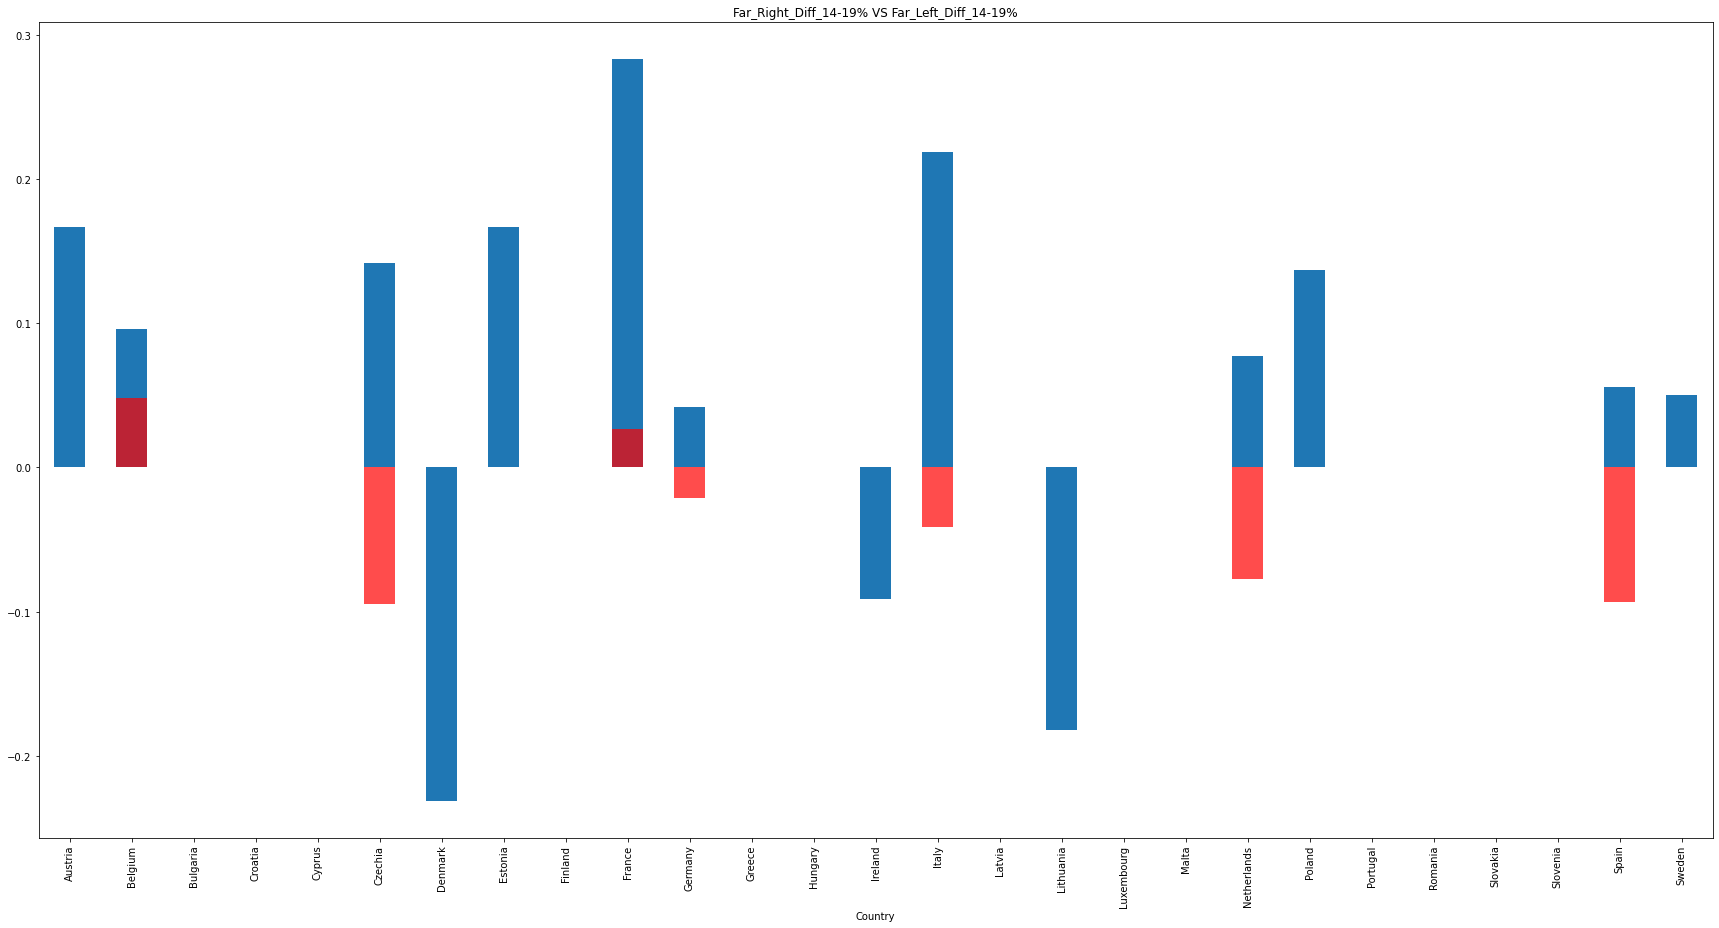

In [59]:
final_df["Far_Right_Diff_14-19%"].iloc[:-2].T.plot.bar(figsize=(30,15),lw=5)
final_df["Far_Left_Diff_14-19%"].iloc[:-2].T.plot.bar(figsize=(30,15),lw=5,color="red",alpha=0.7)
plt.title("Far_Right_Diff_14-19% VS Far_Left_Diff_14-19%")


### 5.5 - Graphical Analysis of Difference in Far Left Voting from 2009 to 2014

<AxesSubplot:xlabel='Country'>

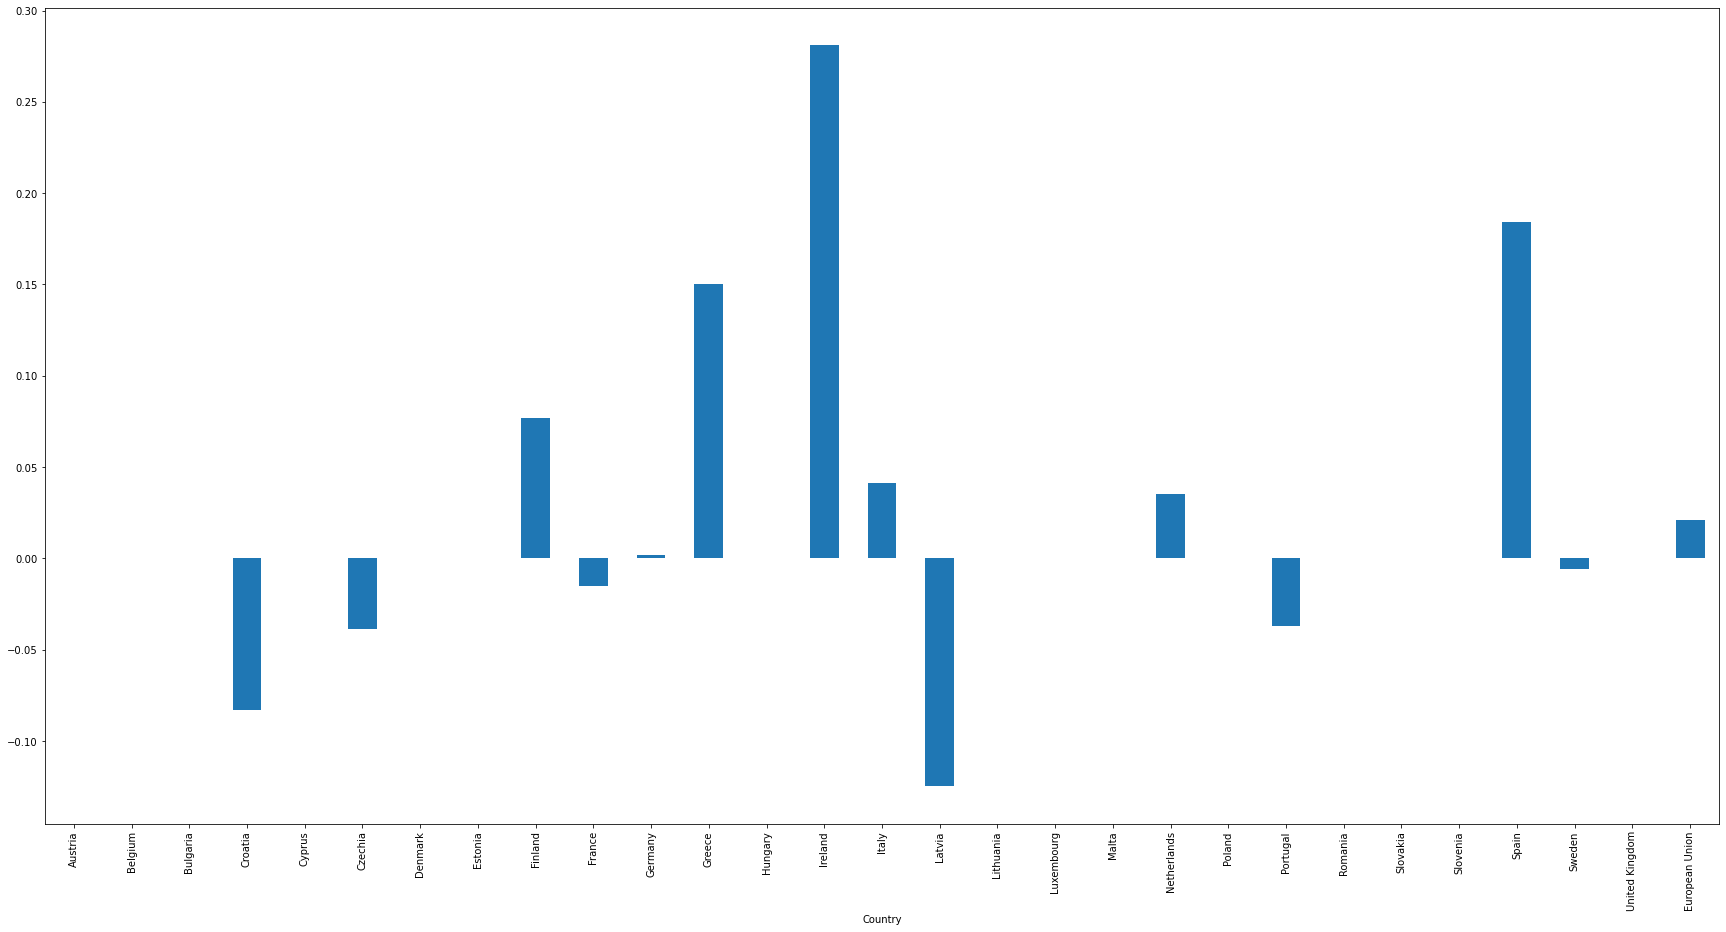

In [60]:
final_df["Far_Left_Diff_09-14%"].T.plot.bar(figsize=(30,15),lw=5)

### 5.6 - Graphical Analysis of Difference in Far LEFT Voting from 2014 to 201

<AxesSubplot:xlabel='Country'>

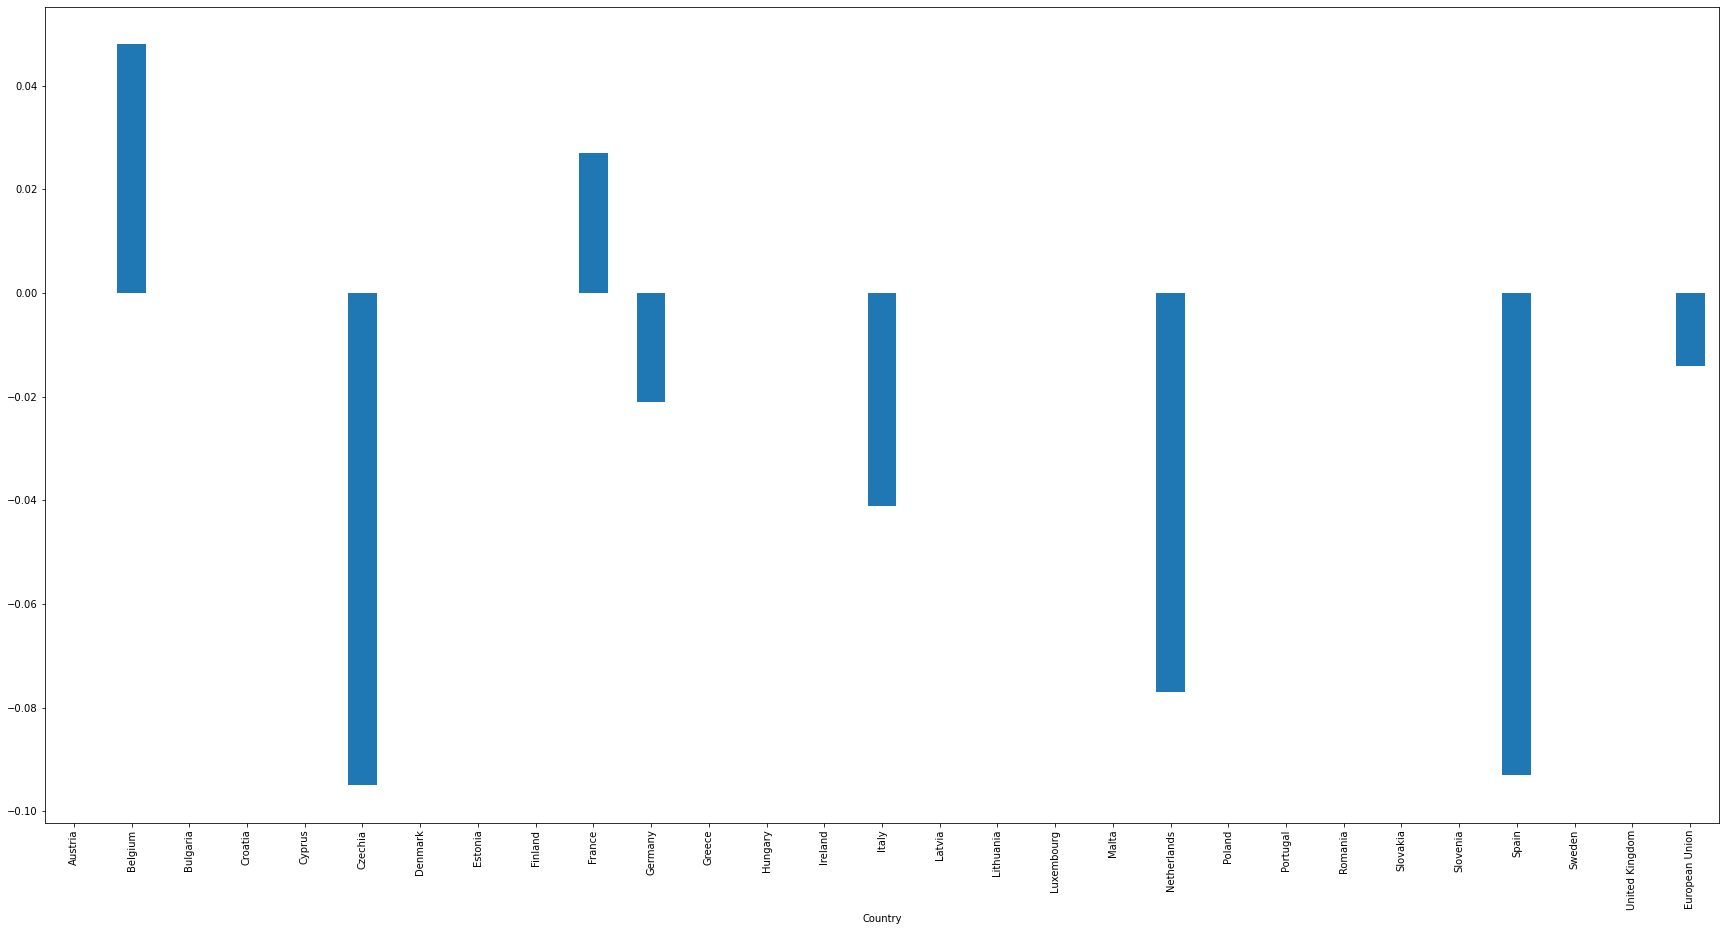

In [61]:
final_df["Far_Left_Diff_14-19%"].T.plot.bar(figsize=(30,15),lw=5)

# 6 - Correlation Analysis Between Far right voting and Migration Numbers

## 6.1 - Construct 2 migration number periods: 2009-2013 and 2014-2018

In [62]:
mig_copy = mig.copy(deep=True)

In [63]:
# Removing UK and European Union tags

mig_copy = mig_copy.filter(items = ["Austria", "Belgium", "Bulgaria", "Cyprus", "Croatia", 
                                                                    "Czechia", "Denmark", "Estonia", "Finland", "France",
                                                                    "Germany", "Greece", "Hungary", "Ireland", "Italy", 
                                                                    "Latvia", "Lithuania", "Luxembourg", "Malta", 
                                                                    "Netherlands", "Poland", "Portugal", "Romania", 
                                                                    "Slovakia", "Slovenia", "Spain", "Sweden"], axis=0)

In [64]:
mig_copy["Period_09_13"] = mig_copy["2009"] + mig_copy["2010"] + mig_copy["2011"] + mig_copy["2012"] + mig_copy["2013"]
mig_copy["Period_14_18"] = mig_copy["2014"] + mig_copy["2015"] + mig_copy["2016"] + mig_copy["2017"] + mig_copy["2018"]

mig_copy.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Period_09_13,Period_14_18
Country,,,,,,,,,,,,
Austria,69295,70978,82230,91557,101866,116262,166323,129509,111801,105633,415926,629528
Belgium,0,135281,147377,129477,120078,123158,146626,123702,126703,137860,532213,658049
Bulgaria,0,0,0,14103,18570,26615,25223,21241,25597,29559,32673,128235
Cyprus,22581,20206,23037,17476,13149,9212,15183,17391,21306,23442,96449,86534
Croatia,13213,8846,8534,8959,10378,10638,11706,13985,15553,26029,49930,77911


### 6.2.1 - Scatterplot between migration number in the period 2009-2013 and votes in far right 2014

<AxesSubplot:xlabel='Far_Right_2014%', ylabel='Period_09_13'>

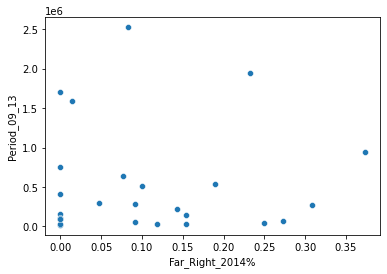

In [65]:
sns.scatterplot(x=final_df["Far_Right_2014%"], y= mig_copy["Period_09_13"])

### 6.2.2 - Scatterplot between migration number in the period 2009-2013 and votes difference in far right 2009-2013

<AxesSubplot:xlabel='Far_Right_Diff_09-14%', ylabel='Period_09_13'>

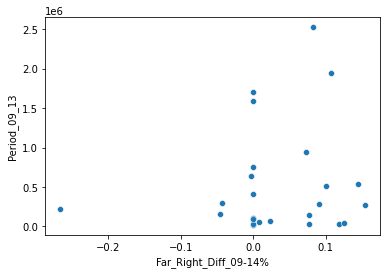

In [66]:
sns.scatterplot(x=final_df["Far_Right_Diff_09-14%"], y= mig_copy["Period_09_13"])

### 6.2.3 - Scatterplot between Far migration number in the period 2014-2018 and votes in far right 2019

<AxesSubplot:xlabel='Far_Right_2019%', ylabel='Period_14_18'>

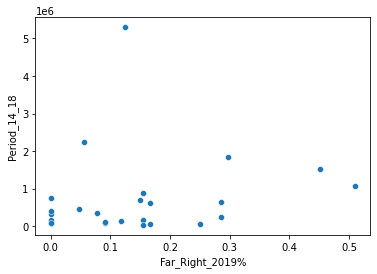

In [67]:
sns.scatterplot(x=final_df["Far_Right_2019%"], y= mig_copy["Period_14_18"])

### 6.2.3 - Scatterplot between Far migration number in the period 2014-2018 and votes in far right differente 2014-2019

<AxesSubplot:xlabel='Far_Right_Diff_14-19%', ylabel='Period_14_18'>

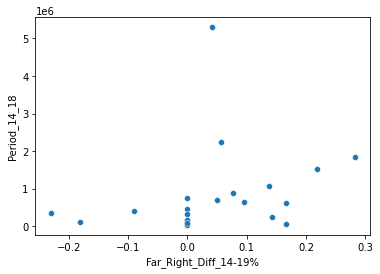

In [68]:
sns.scatterplot(x=final_df["Far_Right_Diff_14-19%"], y= mig_copy["Period_14_18"])

# 7 -  Fertility Rate in European Union Countries Analysis

"The total fertility rate in a specific year is defined as the total number of children that would be born to each woman if she were to live to the end of her child-bearing years and give birth to children in alignment with the prevailing age-specific fertility rates. It is calculated by totalling the age-specific fertility rates as defined over five-year intervals. Assuming no net migration and unchanged mortality, a total fertility rate of 2.1 children per woman ensures a broadly stable population. **Together with mortality and migration, fertility is an element of population growth, reflecting both the causes and effects of economic and social developments**. The reasons for the dramatic decline in birth rates during the past few decades include postponed family formation and child-bearing and a decrease in desired family sizes. This indicator is measured in children per woman."

Source: https://data.oecd.org/pop/fertility-rates.htm

In [69]:
#fert = pd.read_excel("/Users/marcosoliveira/Library/CloudStorage/OneDrive-NOVAIMS/Estatística para Ciência de Dados/Project/Statistics Poster Data/Fertility Rate European Union .xlsx")
fert = pd.read_excel("Fertility Rate European Union .xlsx")
fert.head()

,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,1.85,1.84,1.86,1.81,1.80,1.76,1.74,1.70,1.68,1.65,1.62,1.60
1,Bulgaria,1.56,1.66,1.57,1.51,1.50,1.48,1.53,1.53,1.54,1.56,1.56,1.58
2,Czechia,1.51,1.51,1.51,1.43,1.45,1.46,1.53,1.57,1.63,1.69,1.71,1.71
3,Denmark,1.89,1.84,1.87,1.75,1.73,1.67,1.69,1.71,1.79,1.75,1.73,1.70
4,Germany,1.38,1.36,1.39,1.39,1.41,1.42,1.47,1.50,1.60,1.57,1.57,1.54


In [70]:
# Set index

fert = fert.set_index("Country",drop=True)

In [71]:
# Removing United Kingdom and year 2019

fert = fert.iloc[:-1,:-1]

In [72]:
fert = fert.sort_index()

In [73]:
fert

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Austria,1.42,1.39,1.44,1.43,1.44,1.44,1.46,1.49,1.53,1.52,1.47
Belgium,1.85,1.84,1.86,1.81,1.80,1.76,1.74,1.70,1.68,1.65,1.62
Bulgaria,1.56,1.66,1.57,1.51,1.50,1.48,1.53,1.53,1.54,1.56,1.56
Croatia,1.55,1.58,1.55,1.48,1.51,1.46,1.46,1.40,1.42,1.42,1.47
Cyprus,1.48,1.47,1.44,1.35,1.39,1.30,1.31,1.32,1.37,1.32,1.32
Czechia,1.51,1.51,1.51,1.43,1.45,1.46,1.53,1.57,1.63,1.69,1.71
Denmark,1.89,1.84,1.87,1.75,1.73,1.67,1.69,1.71,1.79,1.75,1.73
Estonia,1.72,1.70,1.72,1.61,1.56,1.52,1.54,1.58,1.60,1.59,1.67
Finland,1.85,1.86,1.87,1.83,1.80,1.75,1.71,1.65,1.57,1.49,1.41


<AxesSubplot:title={'center':'Fertility Year per European Union Country from 2008 till 2018'}>

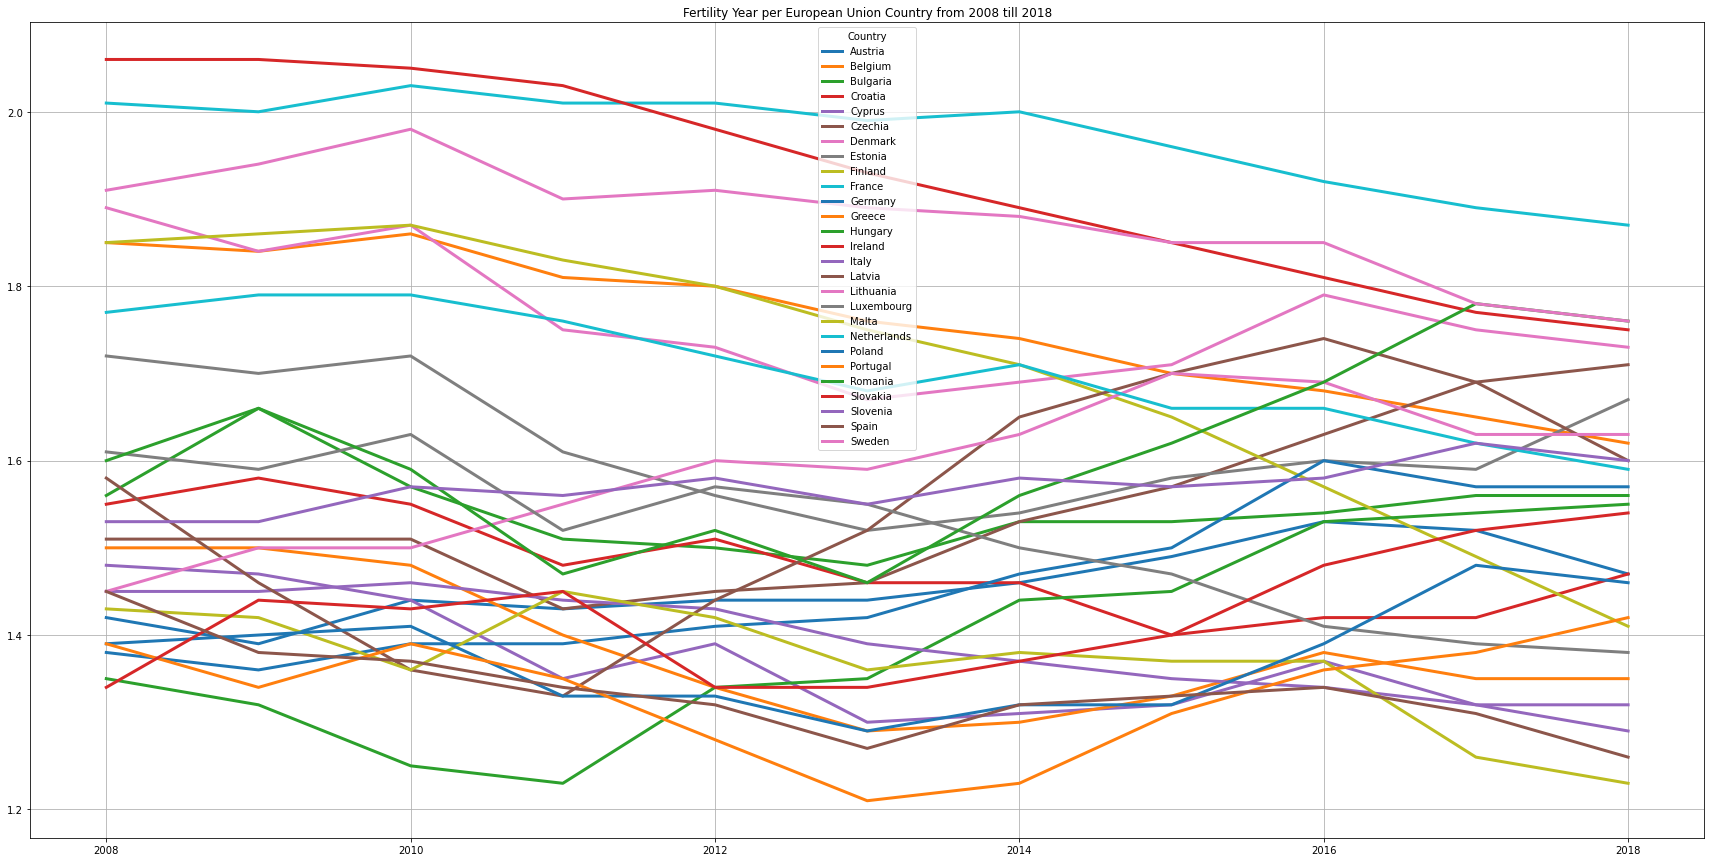

In [74]:
fert_T = fert.T
fert_T.plot.line(figsize=(30,15), 
               title='Fertility Year per European Union Country from 2008 till 2018',
               grid=True,lw=3)

## Grouping Fertility Rate in 2 periods: 2009-2013 and 2014-2018
### We used the mean of the fertility rate on that specific period per country

### Period from 2009-2013

In [75]:
fert_09_13 = fert.iloc[:,1:6].mean(axis=1)
fert_09_13 = pd.DataFrame(fert_09_13)
fert_09_13.rename(columns={0: "fert_09_13"},inplace=True)

In [76]:
fert_09_13.head()

,fert_09_13
Country,
Austria,1.428
Belgium,1.814
Bulgaria,1.544
Croatia,1.516
Cyprus,1.390


### Period from 2014-2018

In [77]:
fert_14_18 = fert.iloc[:,6:-1].mean(axis=1)
fert_14_18 = pd.DataFrame(fert_14_18)
fert_14_18.rename(columns={0: "fert_14_18"},inplace=True)

In [78]:
fert_14_18.head()

,fert_14_18
Country,
Austria,1.5000
Belgium,1.6925
Bulgaria,1.5400
Croatia,1.4250
Cyprus,1.3300


# 8 -  Unemployment Rate in European Union Countries Analysis

"The unemployed are people of working age who are without work, are available for work, and have taken specific steps to find work. The uniform application of this definition results in estimates of unemployment rates that are more internationally comparable than estimates based on national definitions of unemployment. This indicator is measured in numbers of unemployed people as a percentage of the labour force and it is seasonally adjusted. The labour force is defined as the total number of unemployed people plus those in employment. Data are based on labour force surveys (LFS).  For European Union countries where monthly LFS information is not available, the monthly unemployed figures are estimated by Eurostat."

Source: https://data.oecd.org/unemp/unemployment-rate.htm



In [79]:
#Loading Data

unemp = pd.read_excel("unemployment rate EU 25-74 years old per country.xlsx")
unemp

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Belgium,9.5,9.5,9.3,9.3,8.6,7,6.6,7.5,8.2,...,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0,5.4,5.6
1,Bulgaria,:,:,:,:,:,16.9,20.3,18.2,13.7,...,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2,4.2,5.1
2,Czechia,:,:,:,6.5,8.8,8.8,8.2,7.3,7.8,...,6.7,7.0,7.0,6.1,5.1,4.0,2.9,2.2,2.0,2.6
3,Denmark,7.3,6.8,5.7,5.4,5.6,4.6,4.6,4.6,5.4,...,7.8,7.8,7.4,6.9,6.3,6.0,5.8,5.1,5.0,5.6
4,Germany,8.4,9.1,9.9,9.6,8.7,7.9,8,8.8,9.9,...,5.8,5.4,5.2,5.0,4.6,4.1,3.8,3.4,3.1,3.8
5,Estonia,:,:,10.2,10,12.4,14.6,13,11.2,10.3,...,12.3,10.0,8.6,7.4,6.2,6.8,5.8,5.4,4.4,6.8
6,Ireland,12.1,11.6,9.9,7.8,5.9,4.5,4.2,4.7,4.8,...,15.4,15.5,13.8,11.9,10.0,8.4,6.7,5.8,5.0,5.7
7,Greece,9.4,9.8,10.2,11.2,12.1,11.4,10.8,10.4,9.8,...,17.9,24.5,27.5,26.5,24.9,23.6,21.5,19.3,17.3,16.3
8,Spain,22.9,22.1,20.6,18.6,15.7,13.9,10.6,11.5,11.5,...,21.4,24.8,26.1,24.5,22.1,19.6,17.2,15.3,14.1,15.5
9,France,:,:,:,:,:,:,:,:,8.5,...,9.2,9.8,10.3,10.3,10.4,10.1,9.4,9.0,8.4,8.0


In [80]:
# Set Country column as index

unemp = unemp.set_index("Country",drop=True)

In [81]:
unemp = unemp.sort_index()

<AxesSubplot:title={'center':'Unemployment Rate in European Union Countrys from 1995 to 2020'}>

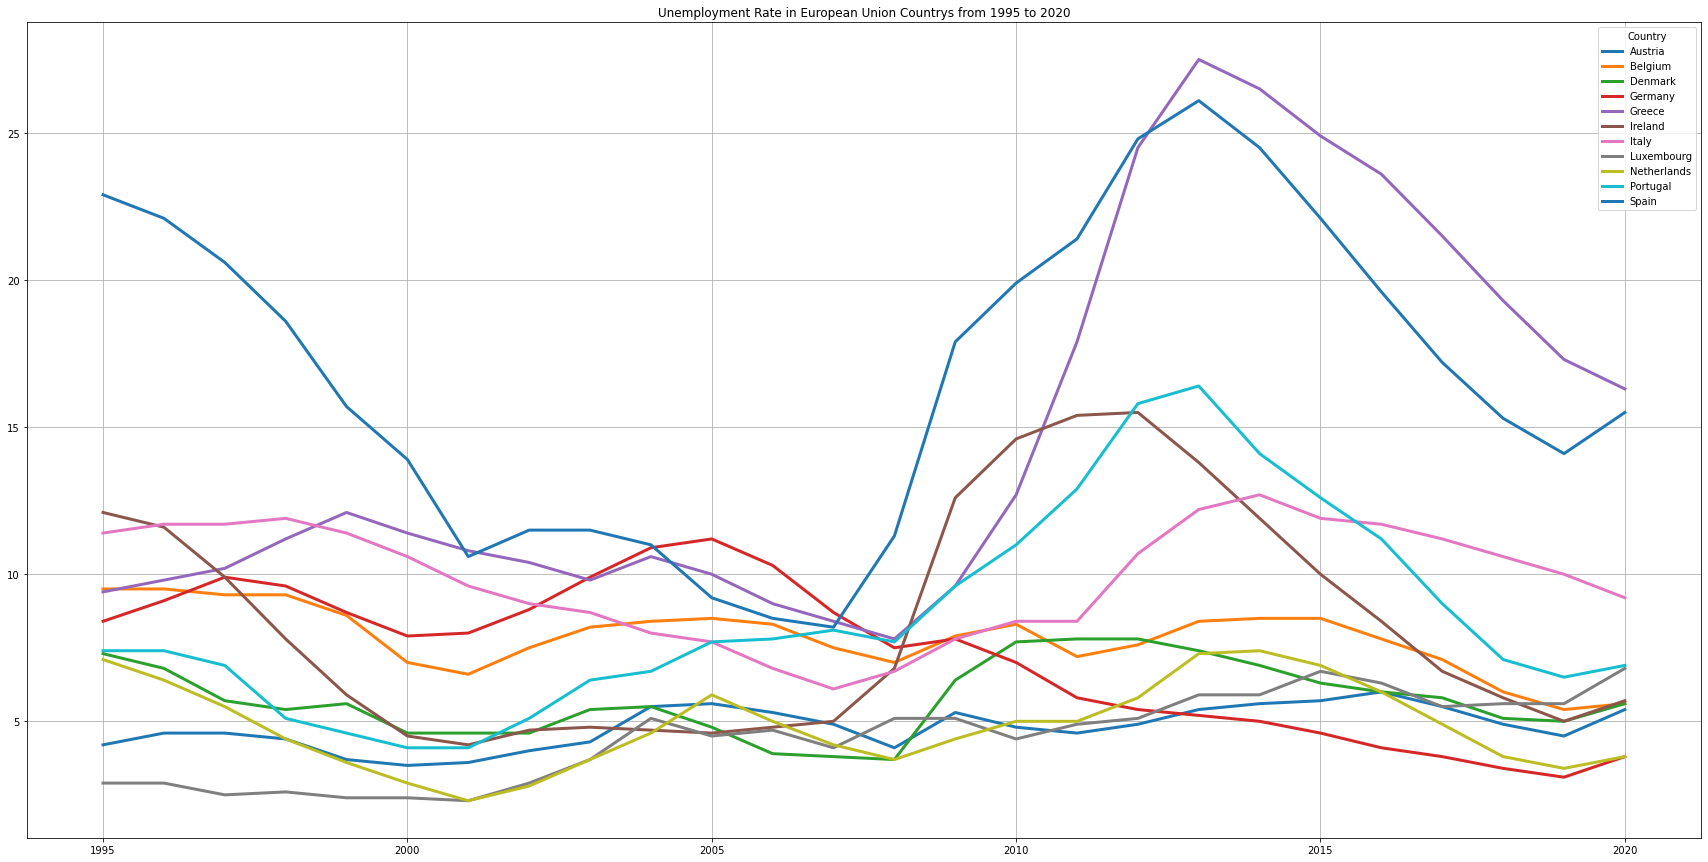

In [82]:
unemp_T = unemp.T
unemp_T.plot.line(figsize=(30,15), 
               title='Unemployment Rate in European Union Countrys from 1995 to 2020',
               grid=True,lw=3)

### Unemployment Rate from 2009 to 2019

In [83]:
unemp_09_18 = unemp.iloc[:, 14:-2]

In [84]:
unemp_09_18

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Austria,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,5.5,4.9
Belgium,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0
Bulgaria,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2
Croatia,9.2,11.7,13.7,16.0,17.3,17.3,16.2,13.1,11.2,8.5
Cyprus,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,11.1,8.4
Czechia,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0,2.9,2.2
Denmark,6.4,7.7,7.8,7.8,7.4,6.9,6.3,6.0,5.8,5.1
Estonia,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8,5.8,5.4
Finland,8.2,8.4,7.8,7.7,8.2,8.7,9.4,8.8,8.6,7.4


<AxesSubplot:title={'center':'Unemployment Rate in European Union Countrys from 2009 to 2018'}>

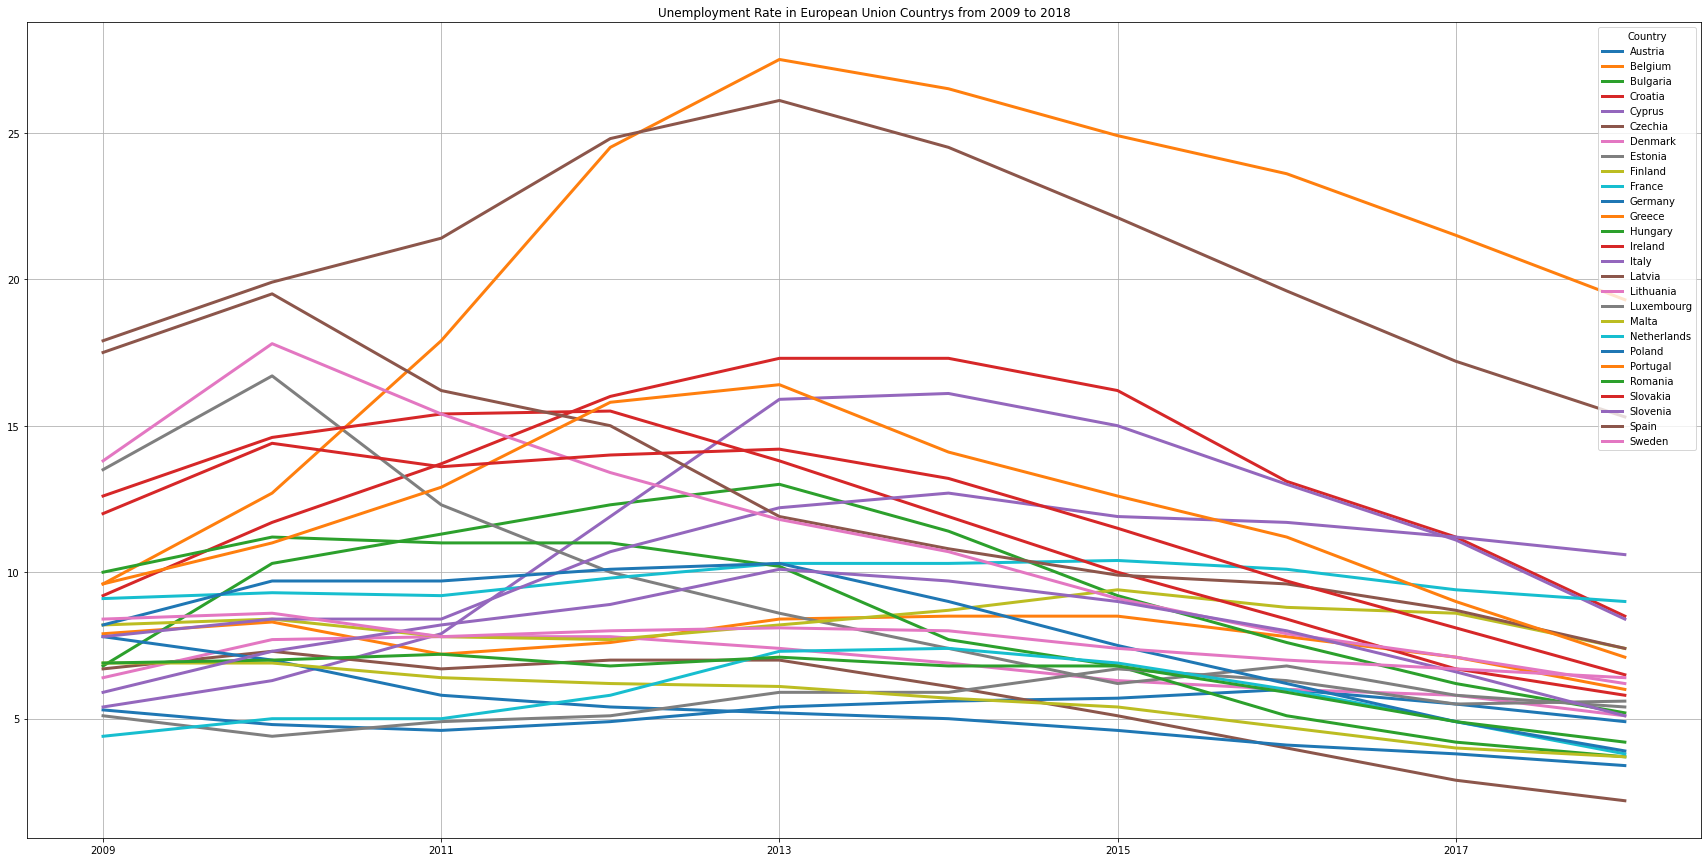

In [85]:
### Graphical Analysis


unemp_09_18_T = unemp_09_18.T
unemp_09_18_T.plot.line(figsize=(30,15), 
               title='Unemployment Rate in European Union Countrys from 2009 to 2018',
               grid=True,lw=3)

## Grouping Unemployment Rate in 2 periods: 2009-2013 and 2014-2018
### We used the mean of the Unemployment rate on that specific period per country

### Period from 2009-2013

In [86]:
unemp_09_13 = unemp[["2009","2010","2011","2012","2013"]].mean(axis=1)
unemp_09_13 = pd.DataFrame(unemp_09_13)
unemp_09_13.rename(columns={0: "unemp_09_13"},inplace=True)

In [87]:
unemp_09_13.head()


,unemp_09_13
Country,
Austria,5.00
Belgium,7.88
Bulgaria,10.74
Croatia,13.58
Cyprus,9.48


### Period from 2014-2018

In [88]:
unemp_14_18 = unemp[["2014","2015","2016","2017","2018"]].mean(axis=1)
unemp_14_18 = pd.DataFrame(unemp_14_18)
unemp_14_18.rename(columns={0: "unemp_14_18"},inplace=True)

In [89]:
unemp_14_18.head()

,unemp_14_18
Country,
Austria,5.54
Belgium,7.58
Bulgaria,7.92
Croatia,13.26
Cyprus,12.72


# 9 - Merging Migration, Parlamient Seats, Fertility Rates and Unemployment Rates per period

### 1st Period 2009-2013

In [90]:
# Creating the Table Period_09_13

Period_09_13 = pd.DataFrame()
Period_09_13["Migration_09_13"] = mig_copy["Period_09_13"]
Period_09_13["Fertility_avg_09_13"] = fert_09_13
Period_09_13["Unemp_avg_09_13"] = unemp_09_13
Period_09_13["Far_Right_2014%"] = final_df["Far_Right_2014%"]
Period_09_13["Far_Left_2014%"] = final_df["Far_Left_2014%"]
Period_09_13["Far_Right_Diff_09-14%"] = final_df["Far_Right_Diff_09-14%"]
Period_09_13["Far_Left_Diff_09-14%"] = final_df["Far_Left_Diff_09-14%"]

In [91]:
Period_09_13.head()

,Migration_09_13,Fertility_avg_09_13,Unemp_avg_09_13,Far_Right_2014%,Far_Left_2014%,Far_Right_Diff_09-14%,Far_Left_Diff_09-14%
Country,,,,,,,
Austria,415926,1.428,5.00,0.000,0.000,0.000,0.000
Belgium,532213,1.814,7.88,0.190,0.000,0.145,0.000
Bulgaria,32673,1.544,10.74,0.118,0.000,0.118,0.000
Cyprus,96449,1.390,9.48,0.000,0.333,0.000,0.000
Croatia,49930,1.516,13.58,0.091,0.000,0.008,-0.083


In [135]:
pop_09_13 = pop_EU.iloc[:,:5]

In [160]:
pop_09_13 = pop_09_13.mean(axis=1)

In [161]:
Period_09_13['Migration_per_hab'] = (Period_09_13['Migration_09_13'] / pop_09_13)*100_000

In [162]:
Period_09_13['Migration_per_hab']

Country
Austria         4960.737484
Belgium         4885.490104
Bulgaria         446.259062
Cyprus         11527.254561
Croatia         1154.705196
Czechia         2064.991663
Denmark         4888.401391
Estonia         1291.173810
Finland         2697.727514
France          2449.497432
Germany         3115.184261
Greece          2663.932907
Hungary         1544.973041
Ireland         6277.066622
Italy           3279.815201
Latvia          1897.937589
Lithuania       2254.759454
Luxembourg     18413.692619
Malta           8449.858165
Netherlands     3807.711578
Poland          2467.097201
Portugal        1059.075918
Romania         3732.435619
Slovakia         500.640928
Slovenia        4328.843743
Spain           3670.106187
Sweden          5488.174441
Name: Migration_per_hab, dtype: float64

### 2nd Period 2014-2018

In [93]:
# Creating the Table Period_14_18

Period_14_18 = pd.DataFrame()
Period_14_18["Migration_14_18"] = mig_copy["Period_14_18"]
Period_14_18["Fertility_avg_14_18"] = fert_14_18
Period_14_18["Unemp_avg_14_18"] = unemp_14_18
Period_14_18["Far_Right_2019%"] = final_df["Far_Right_2019%"]
Period_14_18["Far_Left_2019%"] = final_df["Far_Left_2019%"]
Period_14_18["Far_Right_Diff_14-19%"] = final_df["Far_Right_Diff_14-19%"]
Period_14_18["Far_Left_Diff_14-19%"] = final_df["Far_Left_Diff_14-19%"]

In [94]:
Period_14_18.head()

,Migration_14_18,Fertility_avg_14_18,Unemp_avg_14_18,Far_Right_2019%,Far_Left_2019%,Far_Right_Diff_14-19%,Far_Left_Diff_14-19%
Country,,,,,,,
Austria,629528,1.5000,5.54,0.167,0.000,0.167,0.000
Belgium,658049,1.6925,7.58,0.286,0.048,0.096,0.048
Bulgaria,128235,1.5400,7.92,0.118,0.000,0.000,0.000
Cyprus,86534,1.3300,12.72,0.000,0.333,0.000,0.000
Croatia,77911,1.4250,13.26,0.091,0.000,0.000,0.000


In [139]:
pop_14_18 = pop_EU.iloc[:,5:]

In [140]:
pop_14_18 = pop_14_18.mean(axis=1)

In [141]:
Period_14_18['Migration_per_hab'] = Period_14_18['Migration_14_18'] / pop_14_18*100_000

In [142]:
Period_14_18['Migration_per_hab'].head()

Country
Austria      7254.579949
Belgium      5825.551327
Bulgaria     1793.318325
Cyprus      10127.177804
Croatia      1861.895089
Name: Migration_per_hab, dtype: float64

In [157]:
Period_09_13

,Migration_09_13,Fertility_avg_09_13,Unemp_avg_09_13,Far_Right_2014%,Far_Left_2014%,Far_Right_Diff_09-14%,Far_Left_Diff_09-14%,Migration_per_hab
Country,,,,,,,,
Austria,415926,1.428,5.00,0.000,0.000,0.000,0.000,NaN
Belgium,532213,1.814,7.88,0.190,0.000,0.145,0.000,NaN
Bulgaria,32673,1.544,10.74,0.118,0.000,0.118,0.000,NaN
Cyprus,96449,1.390,9.48,0.000,0.333,0.000,0.000,NaN
Croatia,49930,1.516,13.58,0.091,0.000,0.008,-0.083,NaN
Czechia,215512,1.472,6.94,0.143,0.143,-0.266,-0.039,NaN
Denmark,271590,1.772,7.42,0.308,0.077,0.154,0.000,NaN
Estonia,17151,1.622,12.22,0.000,0.000,0.000,0.000,NaN
Finland,145035,1.822,8.06,0.154,0.077,0.077,0.077,NaN


## 9.2 - Correlation Matrix of each variable per period

### 9.2.1 - Correlation Matrix 1st Period 08-13

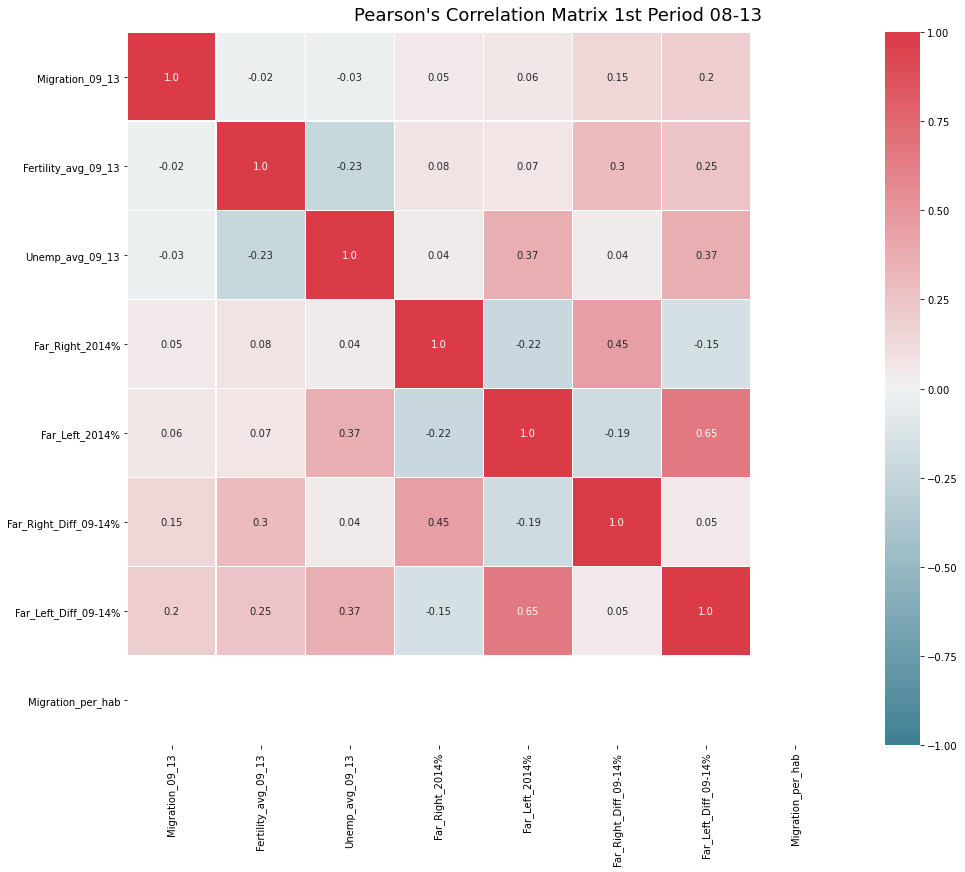

In [143]:
# Prepare figure
fig = plt.figure(figsize=(16, 12))

corr = np.round(Period_09_13.corr(method="pearson"), decimals=2)

mask_annot = corr.values
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson's Correlation Matrix 1st Period 08-13", fontsize=18)

plt.savefig("Fig3.png")

plt.show()

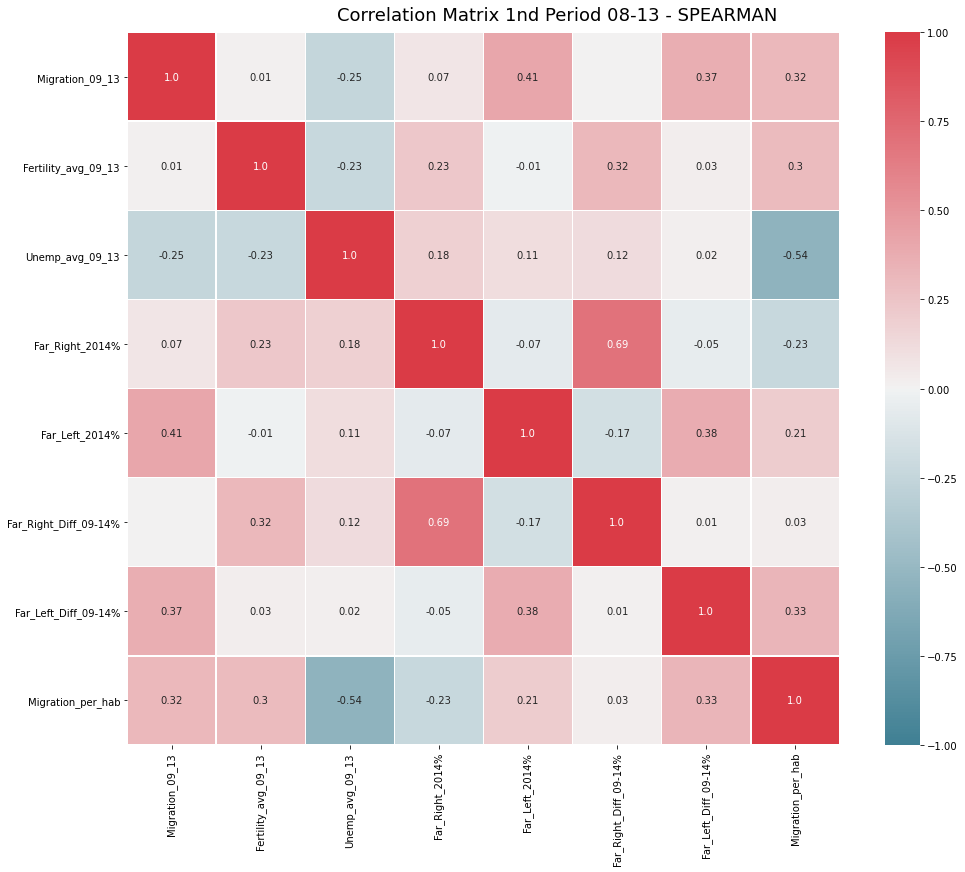

In [180]:
# Prepare figure
fig = plt.figure(figsize=(16, 12))

corr = np.round(Period_09_13.corr(method="spearman"), decimals=2)

mask_annot = corr.values
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix 1nd Period 08-13 - SPEARMAN", fontsize=18)

plt.savefig("Fig3.png")

plt.show()

In [183]:
spearmanr(Period_09_13["Migration_09_13"],Period_09_13["Far_Left_2014%"])

SpearmanrResult(correlation=0.411915209584334, pvalue=0.03276829944892222)

In [185]:
spearmanr(Period_09_13["Unemp_avg_09_13"],Period_09_13["Fertility_avg_09_13"])

SpearmanrResult(correlation=-0.2313797313797314, pvalue=0.24554595628167009)

In [ ]:
def get_lower_tri_heatmap(df, output="cooc_matrix.png"):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns_plot = sns.heatmap(data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    # save to file
    fig = sns_plot.get_figure()
    fig.savefig(output)

### 9.2.2 - Correlation Matrix 2nd Period 14-18

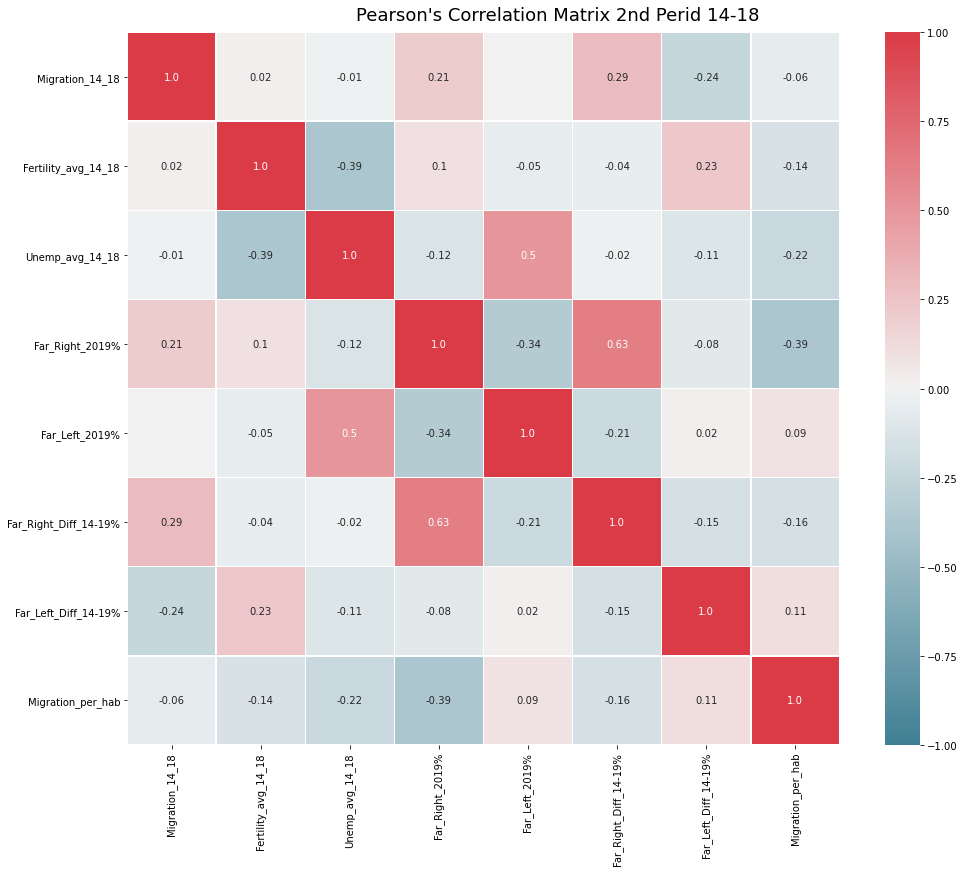

In [98]:
# Prepare figure
fig = plt.figure(figsize=(16, 12))

corr = np.round(Period_14_18.corr(method="pearson"), decimals=2)

mask_annot = corr.values
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson's Correlation Matrix 2nd Perid 14-18", fontsize=18)

plt.savefig("Fig3.png")

plt.show()

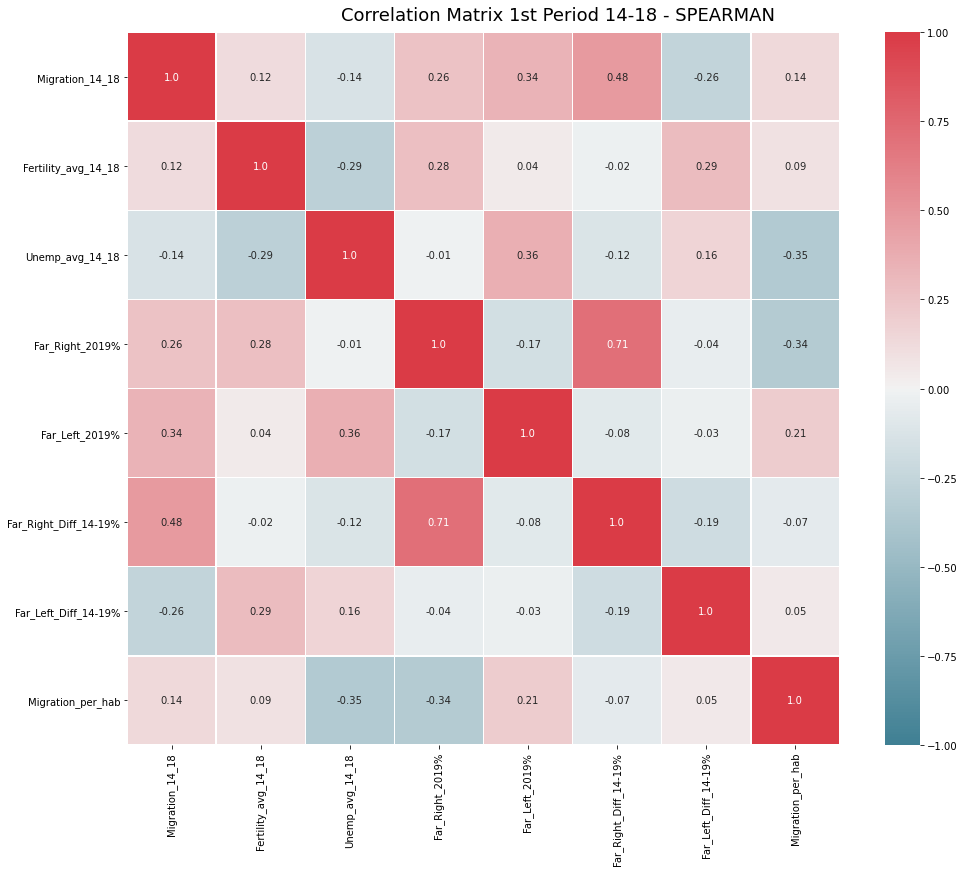

In [145]:
# Prepare figure
fig = plt.figure(figsize=(16, 12))

corr = np.round(Period_14_18.corr(method="spearman"), decimals=2)

mask_annot = corr.values
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix 2nd Period 14-18 - SPEARMAN", fontsize=18)

plt.savefig("Fig3.png")

plt.show()

In [177]:
from scipy import stats


In [179]:
spearmanr(Period_14_18["Migration_14_18"],Period_14_18["Far_Right_Diff_14-19%"])

SpearmanrResult(correlation=0.48411455880122617, pvalue=0.010505488631611718)

In [178]:
spearmanr(Period_14_18["Far_Right_2019%"],Period_14_18["Migration_per_hab"])


SpearmanrResult(correlation=-0.3423420876215052, pvalue=0.0804733238602231)

# 10. Regression and OLS Model

### Graphical Analysis for individual features

In [100]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

## Period 09-13

In [153]:
Period_09_13.columns

Index(['Migration_09_13', 'Fertility_avg_09_13', 'Unemp_avg_09_13',
       'Far_Right_2014%', 'Far_Left_2014%', 'Far_Right_Diff_09-14%',
       'Far_Left_Diff_09-14%', 'Migration_per_hab'],
      dtype='object')

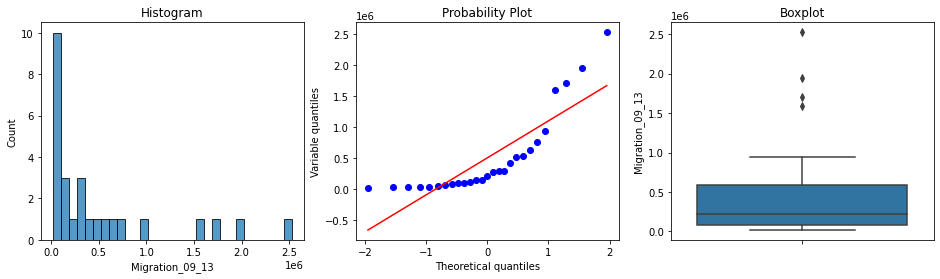

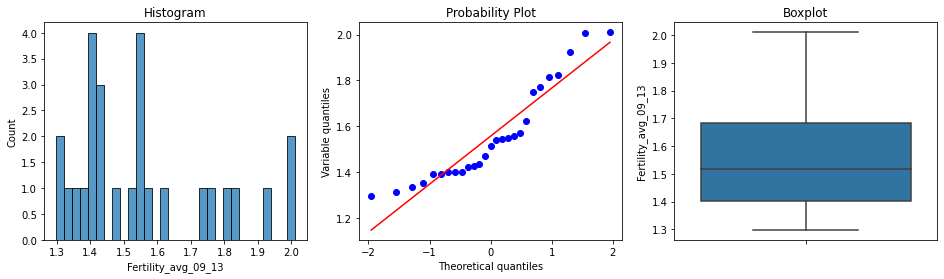

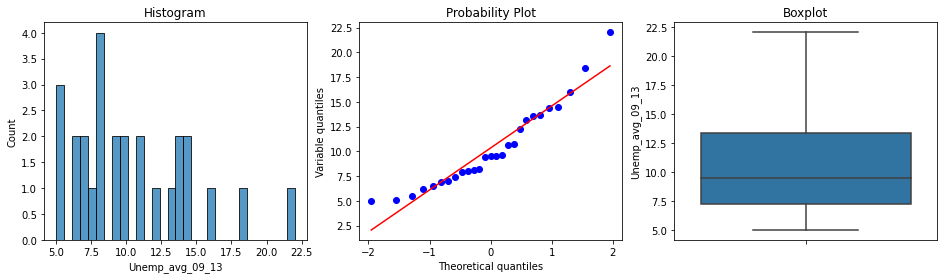

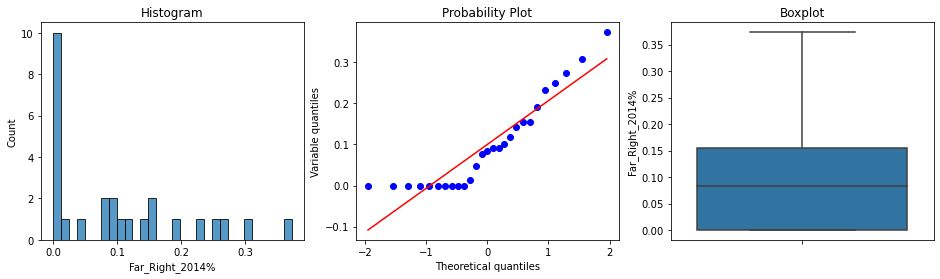

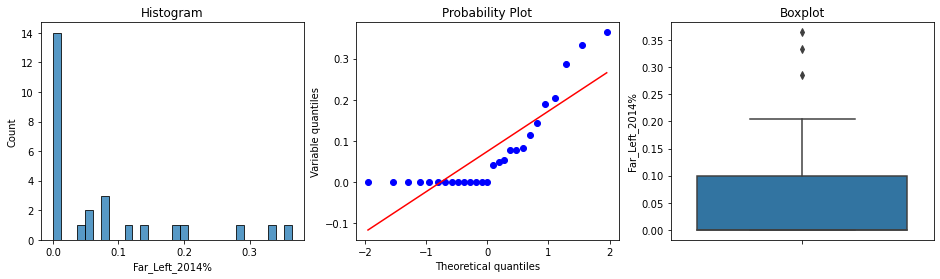

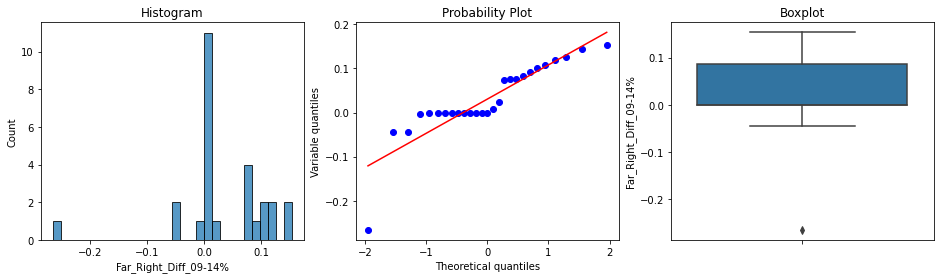

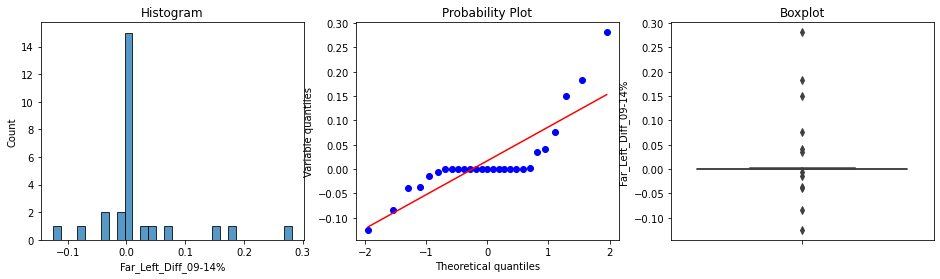

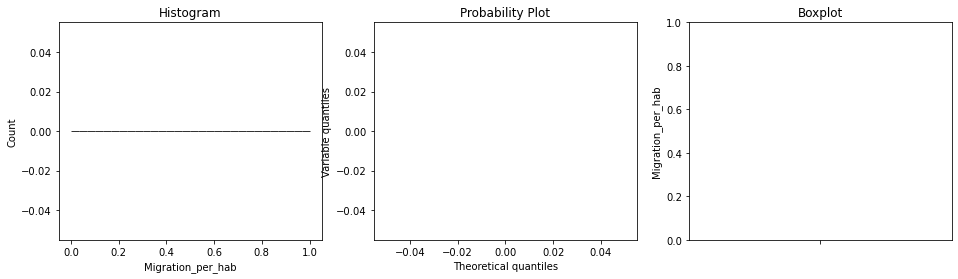

In [154]:
for feature in Period_09_13:
    diagnostic_plots(Period_09_13, feature)


## Period 14-18

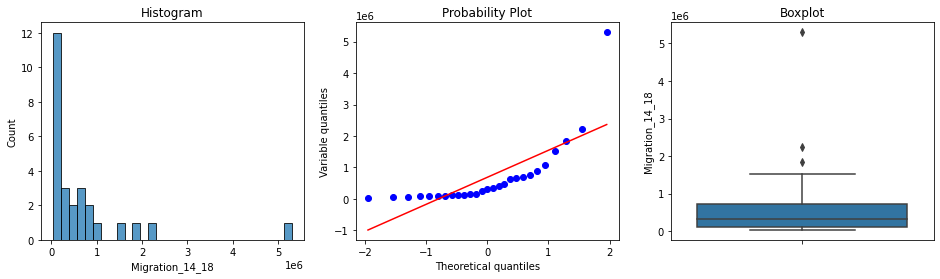

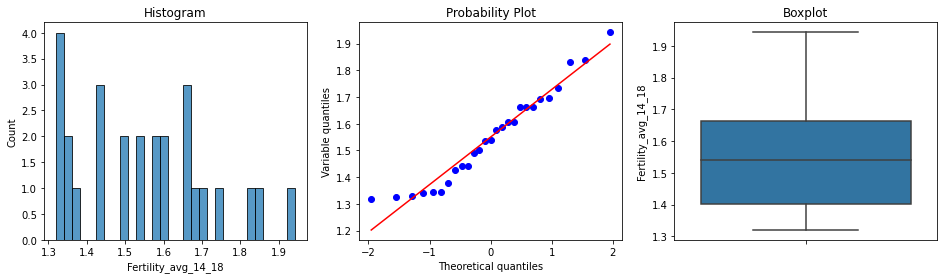

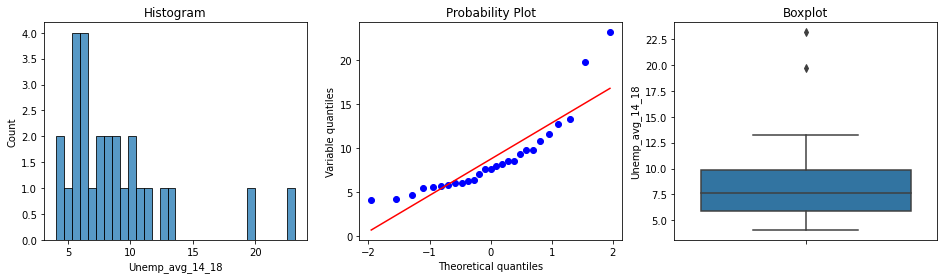

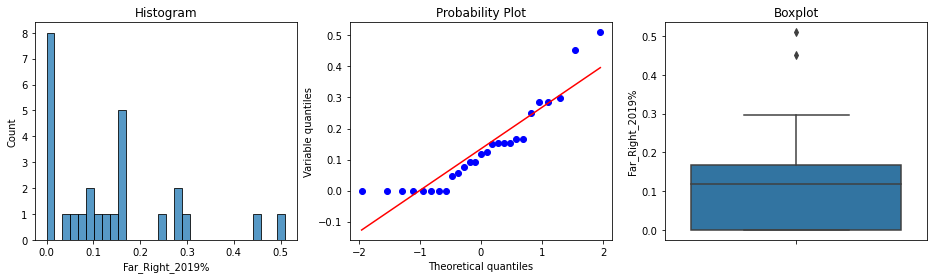

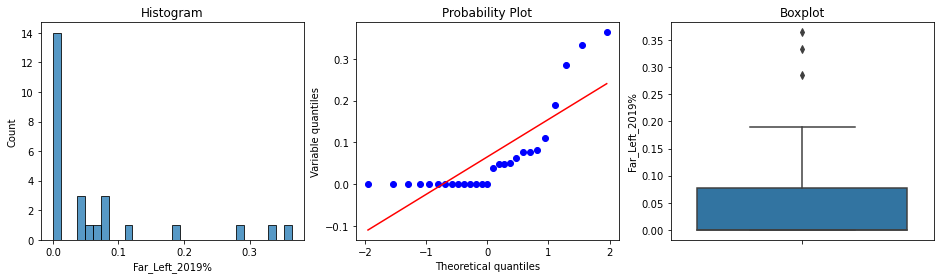

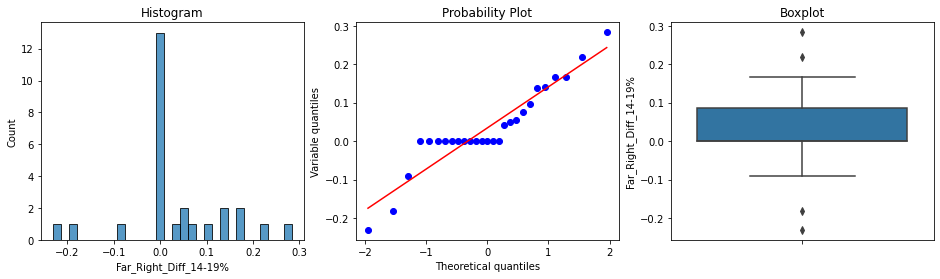

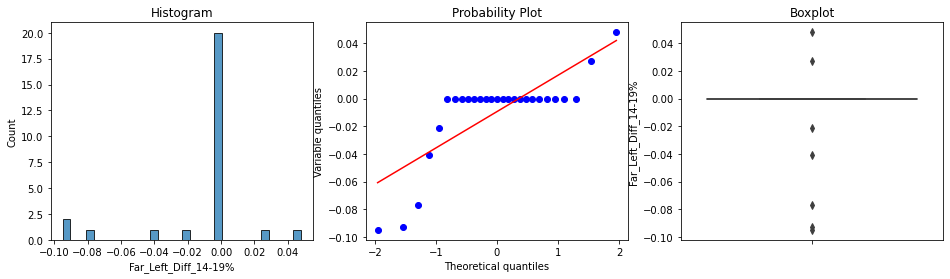

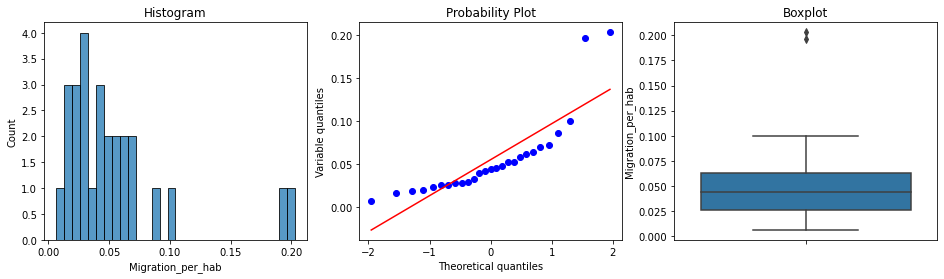

In [103]:
for feature in Period_14_18:
    diagnostic_plots(Period_14_18, feature)

## Data Normalization of the two Periods  - Pipeline 1 - MinMax Scalar

### 1st Period Normalization

In [163]:
from sklearn.preprocessing import RobustScaler

In [164]:
#Fit, Tranform train
scaler = RobustScaler()
Period_09_13_scaled = scaler.fit_transform(Period_09_13) # this will return an array
#Convert the array to a pandas dataframe
Period_09_13_scaled = pd.DataFrame(Period_09_13_scaled, columns = Period_09_13.columns).set_index(Period_09_13.index)

In [165]:
Period_09_13_scaled.describe()

,Migration_09_13,Fertility_avg_09_13,Unemp_avg_09_13,Far_Right_2014%,Far_Left_2014%,Far_Right_Diff_09-14%,Far_Left_Diff_09-14%,Migration_per_hab
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.571237,0.144757,0.137308,0.110390,0.754583,0.351213,17.222222,0.321328
std,1.332549,0.747047,0.688773,0.714849,1.106045,0.951945,78.889569,1.298542
min,-0.393538,-0.767606,-0.731707,-0.538961,0.000000,-3.057471,-125.000000,-0.918583
25%,-0.270905,-0.404930,-0.372358,-0.538961,0.000000,0.000000,0.000000,-0.390200
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.729095,0.595070,0.627642,0.461039,1.000000,1.000000,1.000000,0.609800
max,4.581073,1.739437,2.035772,1.883117,3.676768,1.770115,281.000000,5.265396


### 2nd Period Normalization

In [166]:
#Fit, Tranform 
scaler = RobustScaler()
Period_14_18_scaled = scaler.fit_transform(Period_14_18) # this will return an array
#Convert the array to a pandas dataframe
Period_14_18_scaled = pd.DataFrame(Period_14_18_scaled, columns = Period_14_18.columns).set_index(Period_14_18.index)

In [167]:
Period_14_18_scaled.describe()

,Migration_14_18,Fertility_avg_14_18,Unemp_avg_14_18,Far_Right_2019%,Far_Left_2019%,Far_Right_Diff_14-19%,Far_Left_Diff_14-19%,Migration_per_hab
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.596357,0.038986,0.270408,0.098913,0.848966,0.399058,-0.009333,0.327308
std,1.743400,0.668609,1.130699,0.827452,1.369305,1.258064,0.031869,1.348370
min,-0.454667,-0.842105,-0.923469,-0.706587,0.000000,-2.670520,-0.095000,-1.008976
25%,-0.339448,-0.531100,-0.454082,-0.706587,0.000000,0.000000,0.000000,-0.465268
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.660552,0.468900,0.545918,0.293413,1.000000,1.000000,0.000000,0.534732
max,7.997676,1.540670,3.948980,2.347305,4.727273,3.271676,0.048000,4.610255


## Ordinary Least squares regression

### OLS's for the first period 09-13

### Regression Far RIGHT prediction by migration, Unemployment 09-13

In [109]:
Y = Period_09_13_scaled["Far_Right_2014%"]
X = Period_09_13_scaled[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2014%   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                   0.05388
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.948
Time:                        18:25:47   Log-Likelihood:                -28.678
No. Observations:                  27   AIC:                             63.36
Df Residuals:                      24   BIC:                             67.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0883      0.159     

In [168]:
# Migration per hab

Y = Period_09_13_scaled["Far_Right_2014%"]
X = Period_09_13_scaled[["Migration_per_hab",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2014%   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.022
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.375
Time:                        18:55:51   Log-Likelihood:                -27.635
No. Observations:                  27   AIC:                             61.27
Df Residuals:                      24   BIC:                             65.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1732      0.14

### Regression Far RIGHT % difference prediction by migration, Unemployment 09-13

In [110]:
Y = Period_09_13_scaled['Far_Right_Diff_09-14%']
X = Period_09_13_scaled[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Far_Right_Diff_09-14%   R-squared:                       0.024
Model:                               OLS   Adj. R-squared:                 -0.057
Method:                    Least Squares   F-statistic:                    0.2963
Date:                   Sat, 29 Jan 2022   Prob (F-statistic):              0.746
Time:                           18:27:33   Log-Likelihood:                -36.143
No. Observations:                     27   AIC:                             78.29
Df Residuals:                         24   BIC:                             82.17
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [169]:
# Migration hab

Y = Period_09_13_scaled['Far_Right_Diff_09-14%']
X = Period_09_13_scaled[["Migration_per_hab",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Far_Right_Diff_09-14%   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                 -0.082
Method:                    Least Squares   F-statistic:                   0.01957
Date:                   Sat, 29 Jan 2022   Prob (F-statistic):              0.981
Time:                           18:56:02   Log-Likelihood:                -36.450
No. Observations:                     27   AIC:                             78.90
Df Residuals:                         24   BIC:                             82.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

### Regression Far LEFT prediction by migration, Unemployment 09-13

In [111]:
Y = Period_09_13_scaled["Far_Left_2014%"]
X = Period_09_13_scaled[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2014%   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.959
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.163
Time:                        18:29:27   Log-Likelihood:                -38.482
No. Observations:                  27   AIC:                             82.96
Df Residuals:                      24   BIC:                             86.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6396      0.229     

In [170]:
Y = Period_09_13_scaled["Far_Left_2014%"]
X = Period_09_13_scaled[["Migration_per_hab",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2014%   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.861
Date:                Sat, 29 Jan 2022   Prob (F-statistic):             0.0352
Time:                        18:56:14   Log-Likelihood:                -36.758
No. Observations:                  27   AIC:                             79.52
Df Residuals:                      24   BIC:                             83.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5470      0.20

### Regression Far LEFT % difference prediction by migration, Unemployment 09-13

In [112]:
Y = Period_09_13_scaled['Far_Left_Diff_09-14%']
X = Period_09_13_scaled[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Far_Left_Diff_09-14%   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.111
Method:                   Least Squares   F-statistic:                     2.616
Date:                  Sat, 29 Jan 2022   Prob (F-statistic):             0.0938
Time:                          18:32:11   Log-Likelihood:                -153.08
No. Observations:                    27   AIC:                             312.2
Df Residuals:                        24   BIC:                             316.0
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.

In [171]:
Y = Period_09_13_scaled['Far_Left_Diff_09-14%']
X = Period_09_13_scaled[["Migration_per_hab",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Far_Left_Diff_09-14%   R-squared:                       0.211
Model:                              OLS   Adj. R-squared:                  0.145
Method:                   Least Squares   F-statistic:                     3.203
Date:                  Sat, 29 Jan 2022   Prob (F-statistic):             0.0585
Time:                          18:56:28   Log-Likelihood:                -152.54
No. Observations:                    27   AIC:                             311.1
Df Residuals:                        24   BIC:                             315.0
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

### OLS's for the second period 14-18

### Regression Far RIGHT prediction by migration, Unemployment 14-18

In [113]:
Y = Period_14_18_scaled["Far_Right_2019%"]
X = Period_14_18_scaled[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2019%   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.7183
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.498
Time:                        18:33:42   Log-Likelihood:                -31.903
No. Observations:                  27   AIC:                             69.81
Df Residuals:                      24   BIC:                             73.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0629      0.175     

In [172]:
Y = Period_14_18_scaled["Far_Right_2019%"]
X = Period_14_18_scaled[["Migration_per_hab",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2019%   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     2.838
Date:                Sat, 29 Jan 2022   Prob (F-statistic):             0.0783
Time:                        18:56:35   Log-Likelihood:                -29.823
No. Observations:                  27   AIC:                             65.65
Df Residuals:                      24   BIC:                             69.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2280      0.16

In [174]:
Y = Period_14_18_scaled["Far_Right_2019%"]
X = Period_14_18_scaled["Migration_per_hab"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2019%   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     4.346
Date:                Sat, 29 Jan 2022   Prob (F-statistic):             0.0475
Time:                        19:03:34   Log-Likelihood:                -30.524
No. Observations:                  27   AIC:                             65.05
Df Residuals:                      25   BIC:                             67.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1762      0.15

In [118]:
Period_14_18_scaled.Migration_per_hab.describe()

count    27.000000
mean      0.298964
std       1.305381
min      -1.037732
25%      -0.484080
50%       0.000000
75%       0.515920
max       4.387685
Name: Migration_per_hab, dtype: float64

In [121]:
Period_14_18_scaled.Migration_per_hab, Period_09_13_scaled.Migration_per_hab

(Country
 Austria        0.756153
 Belgium        0.380227
 Bulgaria      -0.710680
 Cyprus         1.549915
 Croatia       -0.688940
 Czechia       -0.584957
 Denmark        0.479291
 Estonia        0.236910
 Finland       -0.421530
 France        -0.455506
 Germany        0.552548
 Greece         0.000000
 Hungary       -0.316559
 Ireland        1.161821
 Italy         -0.512654
 Latvia        -0.513444
 Lithuania     -0.074451
 Luxembourg     4.197358
 Malta          4.387685
 Netherlands    0.209216
 Poland        -0.433610
 Portugal      -0.785852
 Romania       -0.144313
 Slovakia      -1.037732
 Slovenia       0.030900
 Spain          0.110894
 Sweden         0.699327
 Name: Migration_per_hab, dtype: float64,
 Country
 Austria        0.635449
 Belgium        0.584656
 Bulgaria      -0.955949
 Cyprus         2.847794
 Croatia       -0.698715
 Czechia       -0.386358
 Denmark        0.609272
 Estonia       -0.653288
 Finland       -0.164587
 France        -0.253092
 Germany       

### Regression Far RIGHT % difference prediction by migration, Unemployment 14-18

In [119]:
Period_09_13_scaled.Migration_per_hab.describe()

count    27.000000
mean      0.304421
std       1.285074
min      -0.955949
25%      -0.403036
50%       0.000000
75%       0.596964
max       5.149264
Name: Migration_per_hab, dtype: float64

In [114]:
Y = Period_14_18_scaled['Far_Right_Diff_14-19%']
X = Period_14_18_scaled[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Far_Right_Diff_14-19%   R-squared:                       0.083
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     1.093
Date:                   Sat, 29 Jan 2022   Prob (F-statistic):              0.351
Time:                           18:35:31   Log-Likelihood:                -42.823
No. Observations:                     27   AIC:                             91.65
Df Residuals:                         24   BIC:                             95.53
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [173]:
Y = Period_14_18_scaled['Far_Right_Diff_14-19%']
X = Period_14_18_scaled[["Migration_per_hab",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Far_Right_Diff_14-19%   R-squared:                       0.027
Model:                               OLS   Adj. R-squared:                 -0.054
Method:                    Least Squares   F-statistic:                    0.3296
Date:                   Sat, 29 Jan 2022   Prob (F-statistic):              0.722
Time:                           18:56:47   Log-Likelihood:                -43.634
No. Observations:                     27   AIC:                             93.27
Df Residuals:                         24   BIC:                             97.16
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

### Regression Far LEFT prediction by migration, Unemployment 14-18

In [116]:
Y = Period_14_18_scaled["Far_Left_2019%"]
X = Period_14_18_scaled[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2019%   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4.057
Date:                Sat, 29 Jan 2022   Prob (F-statistic):             0.0304
Time:                        18:36:23   Log-Likelihood:                -42.357
No. Observations:                  27   AIC:                             90.71
Df Residuals:                      24   BIC:                             94.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6814      0.258     

In [200]:
Y = Period_14_18_scaled["Far_Left_2019%"]
X = Period_14_18_scaled[["Migration_per_hab",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2019%   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     4.988
Date:                Sat, 29 Jan 2022   Prob (F-statistic):             0.0154
Time:                        16:26:10   Log-Likelihood:                -41.596
No. Observations:                  27   AIC:                             89.19
Df Residuals:                      24   BIC:                             93.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6042      0.24

### Regression Far LEFT % difference prediction by migration, Unemployment 14-18

In [117]:
Y = Period_14_18_scaled['Far_Left_Diff_14-19%']
X = Period_14_18_scaled[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Far_Left_Diff_14-19%   R-squared:                       0.071
Model:                              OLS   Adj. R-squared:                 -0.006
Method:                   Least Squares   F-statistic:                    0.9222
Date:                  Sat, 29 Jan 2022   Prob (F-statistic):              0.411
Time:                          18:37:26   Log-Likelihood:                 56.243
No. Observations:                    27   AIC:                            -106.5
Df Residuals:                        24   BIC:                            -102.6
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.

In [201]:
Y = Period_14_18_scaled['Far_Left_Diff_14-19%']
X = Period_14_18_scaled[["Migration_per_hab",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Far_Left_Diff_14-19%   R-squared:                       0.020
Model:                              OLS   Adj. R-squared:                 -0.062
Method:                   Least Squares   F-statistic:                    0.2423
Date:                  Sat, 29 Jan 2022   Prob (F-statistic):              0.787
Time:                          16:26:28   Log-Likelihood:                 55.513
No. Observations:                    27   AIC:                            -105.0
Df Residuals:                        24   BIC:                            -101.1
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

## Clustering 

## Clustering 1st Period 

In [138]:
from sklearn.cluster import KMeans

In [139]:
#Make a copy 
data_clusters_09_13 = Period_09_13_scaled.copy()

In [140]:
range_clusters = range(1, 11)

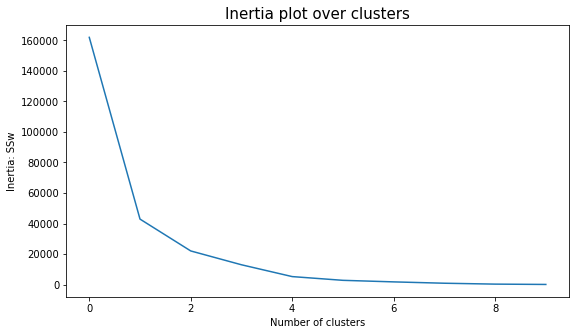

In [141]:
# Defining the number of K

inertia_power = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    Power = kmclust.fit(data_clusters_09_13)
    inertia_power.append(Power.inertia_)

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia_power)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show() 

In [142]:
# final cluster solution
number_clusters = 2
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(data_clusters_09_13)
km_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [143]:
data_clusters_09_13["Cluster"] = km_labels

In [144]:
data_clusters_09_13

,Migration_09_13,Fertility_avg_09_13,Unemp_avg_09_13,Far_Right_2014%,Far_Left_2014%,Far_Right_Diff_09-14%,Far_Left_Diff_09-14%,Cluster
Country,,,,,,,,
Austria,0.397611,-0.309859,-0.731707,-0.538961,0.000000,0.000000,0.0,0
Belgium,0.628318,1.049296,-0.263415,0.694805,0.000000,1.666667,0.0,0
Bulgaria,-0.362743,0.098592,0.201626,0.227273,0.000000,1.356322,0.0,0
Cyprus,-0.236215,-0.443662,-0.003252,-0.538961,3.363636,0.000000,0.0,0
Croatia,-0.328506,0.000000,0.663415,0.051948,0.000000,0.091954,-83.0,0
Czechia,0.000000,-0.154930,-0.416260,0.389610,1.444444,-3.057471,-39.0,0
Denmark,0.111256,0.901408,-0.338211,1.461039,0.777778,1.770115,0.0,0
Estonia,-0.393538,0.373239,0.442276,-0.538961,0.000000,0.000000,0.0,0
Finland,-0.139823,1.077465,-0.234146,0.461039,0.777778,0.885057,77.0,0


In [145]:
data_clusters_09_13.groupby("Cluster").mean()

,Migration_09_13,Fertility_avg_09_13,Unemp_avg_09_13,Far_Right_2014%,Far_Left_2014%,Far_Right_Diff_09-14%,Far_Left_Diff_09-14%
Cluster,,,,,,,
0,0.506601,0.133509,-0.023984,0.153950,0.489478,0.372126,-6.25
1,1.088324,0.234742,1.427642,-0.238095,2.875421,0.183908,205.00


<AxesSubplot:xlabel='Far_Left_Diff_09-14%', ylabel='Count'>

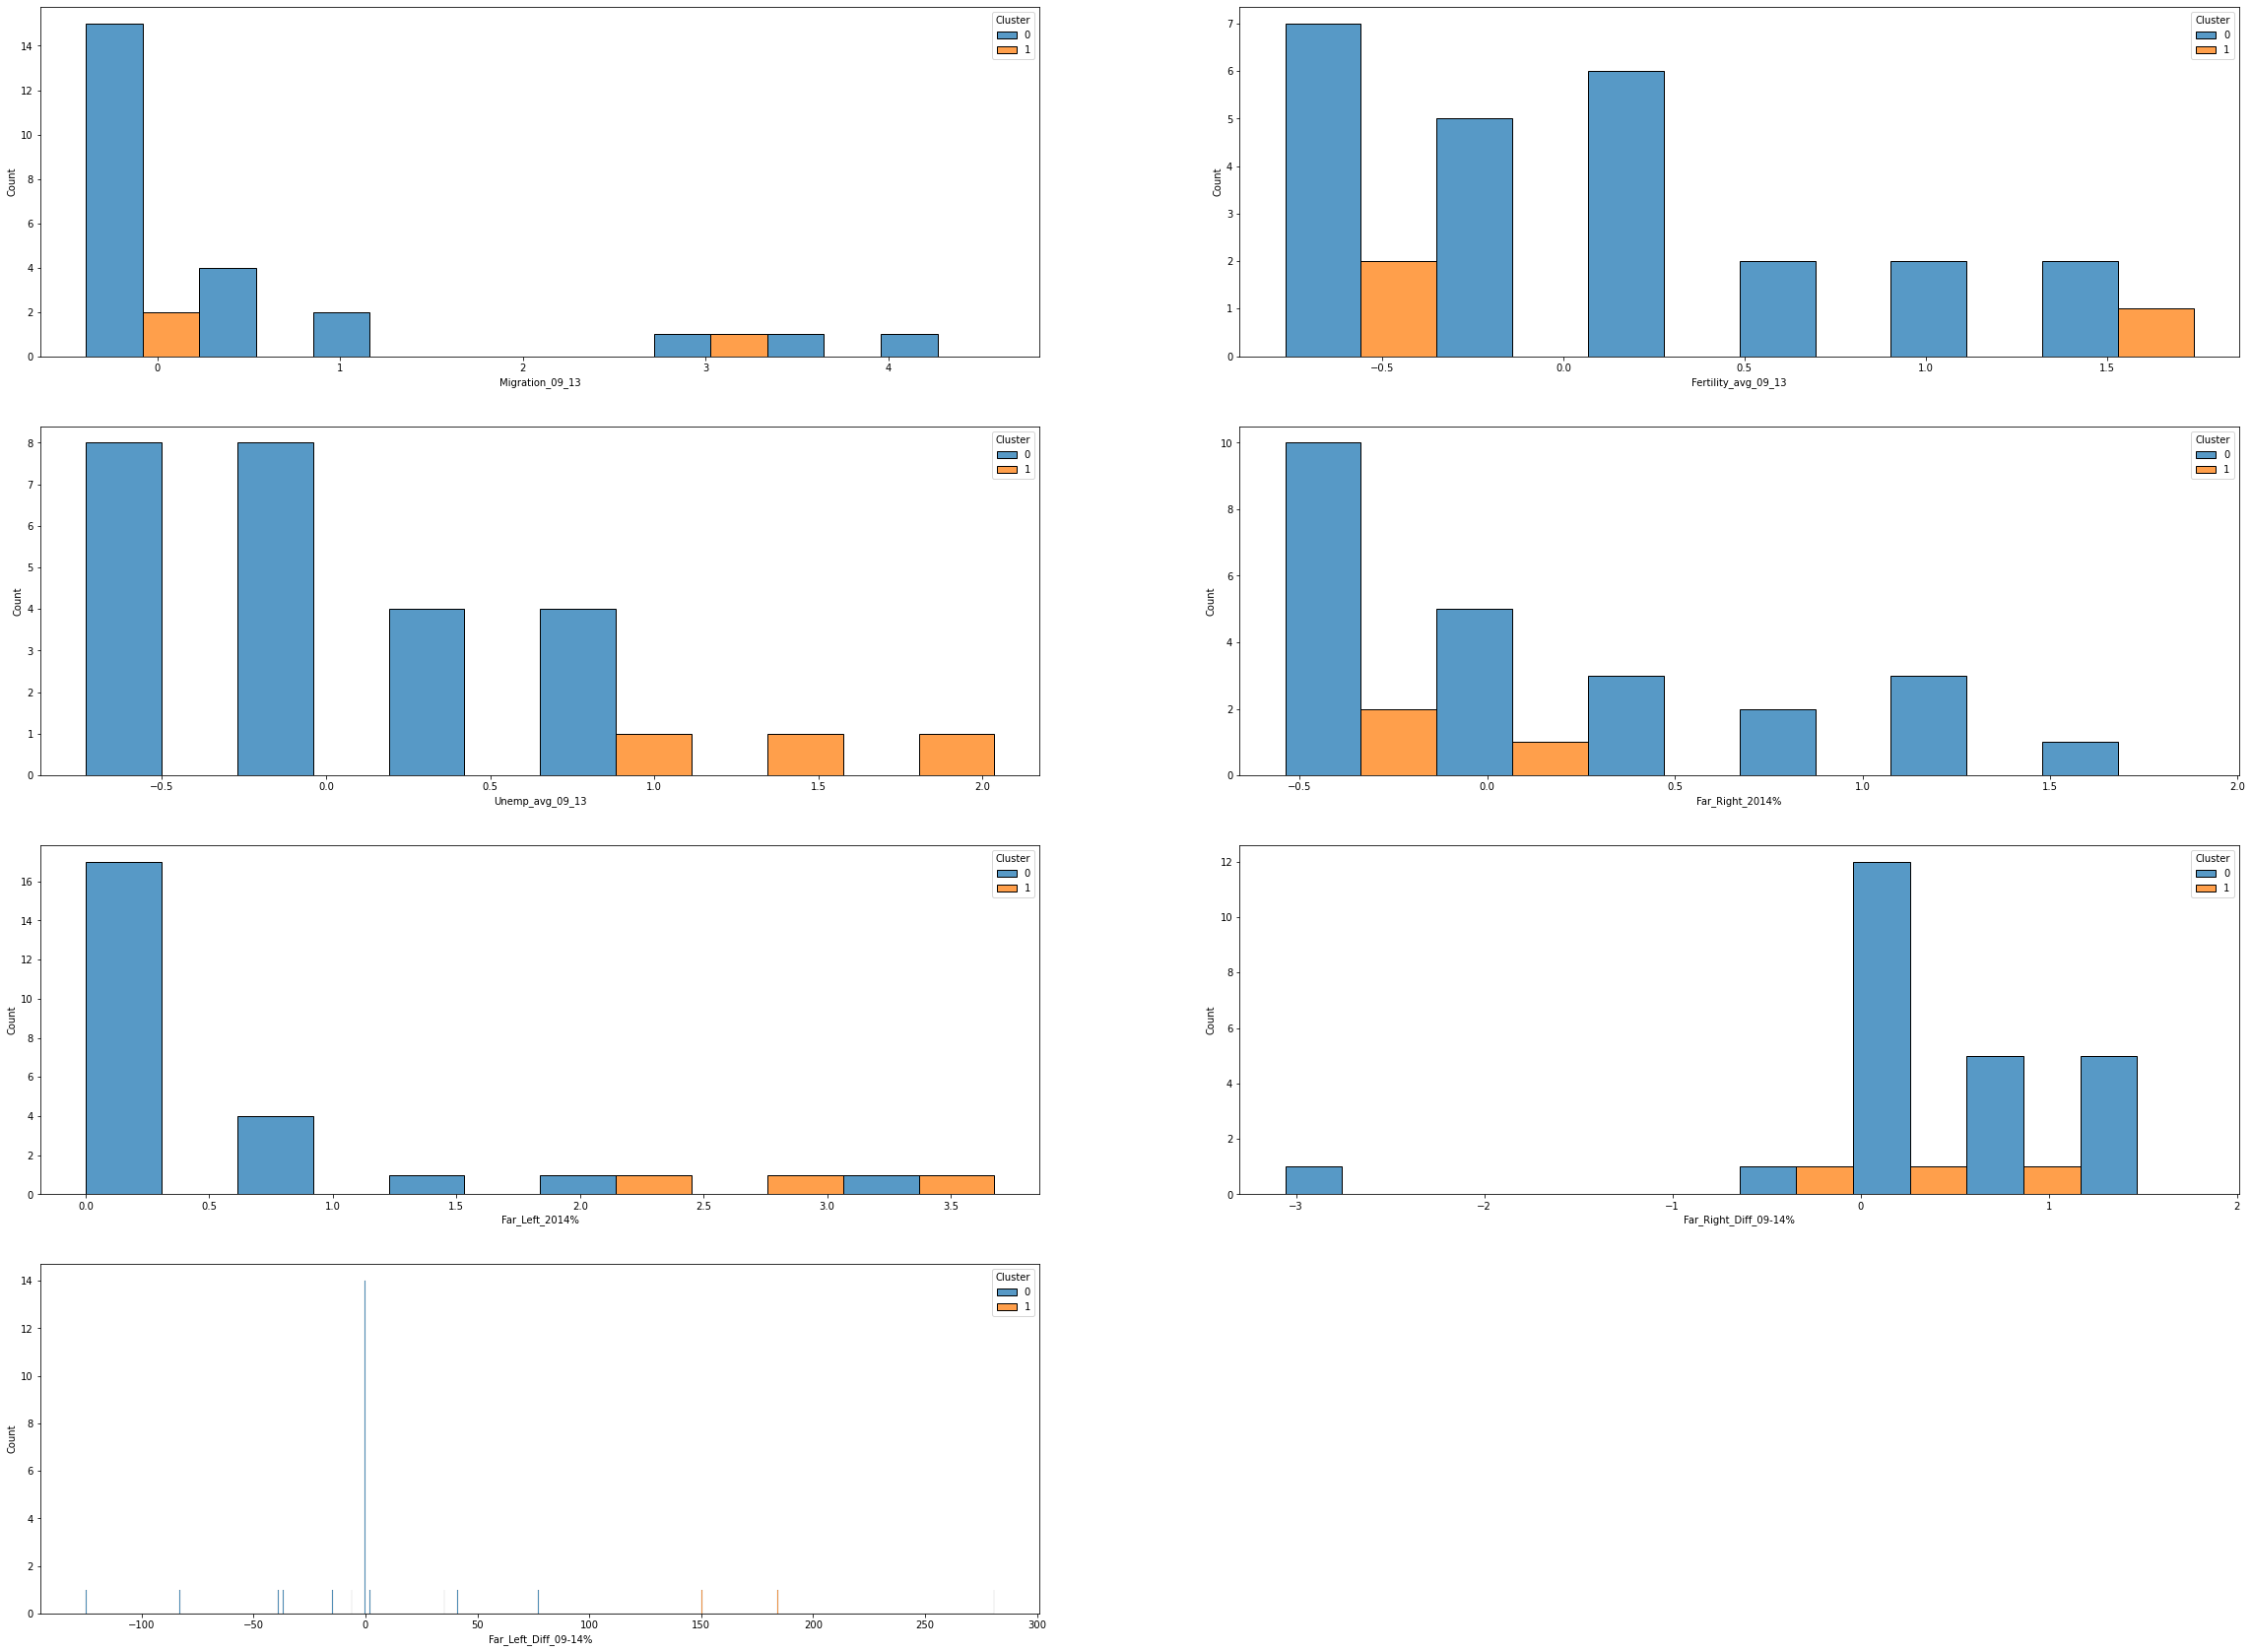

In [146]:
# plotting sub-plots to analyse the distribution of Donors Clusters
plt.figure(figsize=(40,30))

plt.subplot(4,2,1)
sns.histplot(x='Migration_09_13',   data=data_clusters_09_13, hue = "Cluster", multiple='dodge')

plt.subplot(4,2,2)
sns.histplot(x='Fertility_avg_09_13',   data=data_clusters_09_13, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,3)
sns.histplot(x='Unemp_avg_09_13',   data=data_clusters_09_13, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,4)
sns.histplot(x='Far_Right_2014%',   data=data_clusters_09_13, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,5)
sns.histplot(x='Far_Left_2014%',   data=data_clusters_09_13, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,6)
sns.histplot(x='Far_Right_Diff_09-14%',   data=data_clusters_09_13, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,7)
sns.histplot(x='Far_Left_Diff_09-14%',   data=data_clusters_09_13, hue = "Cluster", multiple='dodge')

## Clustering 2nd Period 

In [147]:
Period_14_18_scaled.head()

,Migration_14_18,Fertility_avg_14_18,Unemp_avg_14_18,Far_Right_2019%,Far_Left_2019%,Far_Right_Diff_14-19%,Far_Left_Diff_14-19%
Country,,,,,,,
Austria,0.501101,-0.153110,-0.545918,0.293413,0.000000,1.930636,0.000
Belgium,0.546911,0.583732,-0.025510,1.005988,0.623377,1.109827,0.048
Bulgaria,-0.304079,0.000000,0.061224,0.000000,0.000000,0.000000,0.000
Cyprus,-0.371059,-0.803828,1.285714,-0.706587,4.324675,0.000000,0.000
Croatia,-0.384909,-0.440191,1.423469,-0.161677,0.000000,0.000000,0.000


In [148]:
#Make a copy 
data_clusters_14_18 = Period_14_18_scaled.copy()

In [149]:
range_clusters = range(1, 11)

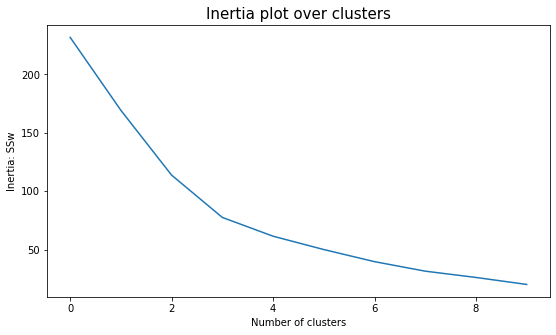

In [150]:
inertia_power = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    Power = kmclust.fit(data_clusters_14_18)
    inertia_power.append(Power.inertia_)
    
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia_power)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [151]:
# final cluster solution
number_clusters = 2
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(data_clusters_14_18)
km_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1])

In [152]:
data_clusters_14_18["Cluster"] = km_labels

In [153]:
data_clusters_14_18

,Migration_14_18,Fertility_avg_14_18,Unemp_avg_14_18,Far_Right_2019%,Far_Left_2019%,Far_Right_Diff_14-19%,Far_Left_Diff_14-19%,Cluster
Country,,,,,,,,
Austria,0.501101,-0.153110,-0.545918,0.293413,0.000000,1.930636,0.000,1
Belgium,0.546911,0.583732,-0.025510,1.005988,0.623377,1.109827,0.048,1
Bulgaria,-0.304079,0.000000,0.061224,0.000000,0.000000,0.000000,0.000,1
Cyprus,-0.371059,-0.803828,1.285714,-0.706587,4.324675,0.000000,0.000,1
Croatia,-0.384909,-0.440191,1.423469,-0.161677,0.000000,0.000000,0.000,1
Czechia,-0.122410,0.248804,-0.923469,1.000000,0.623377,1.641618,-0.095,1
Denmark,0.059367,0.746411,-0.423469,-0.245509,1.000000,-2.670520,0.000,1
Estonia,-0.398737,0.143541,-0.346939,0.293413,0.000000,1.930636,0.000,1
Finland,-0.256172,0.248804,0.229592,0.215569,1.000000,0.000000,0.000,1


In [154]:
data_clusters_14_18.groupby('Cluster').mean()

,Migration_14_18,Fertility_avg_14_18,Unemp_avg_14_18,Far_Right_2019%,Far_Left_2019%,Far_Right_Diff_14-19%,Far_Left_Diff_14-19%
Cluster,,,,,,,
0,3.870193,-0.011962,0.934949,0.685629,0.824675,1.734104,-0.032000
1,0.026994,0.047847,0.154836,-0.003124,0.853190,0.166876,-0.005391


<AxesSubplot:xlabel='Far_Left_Diff_14-19%', ylabel='Count'>

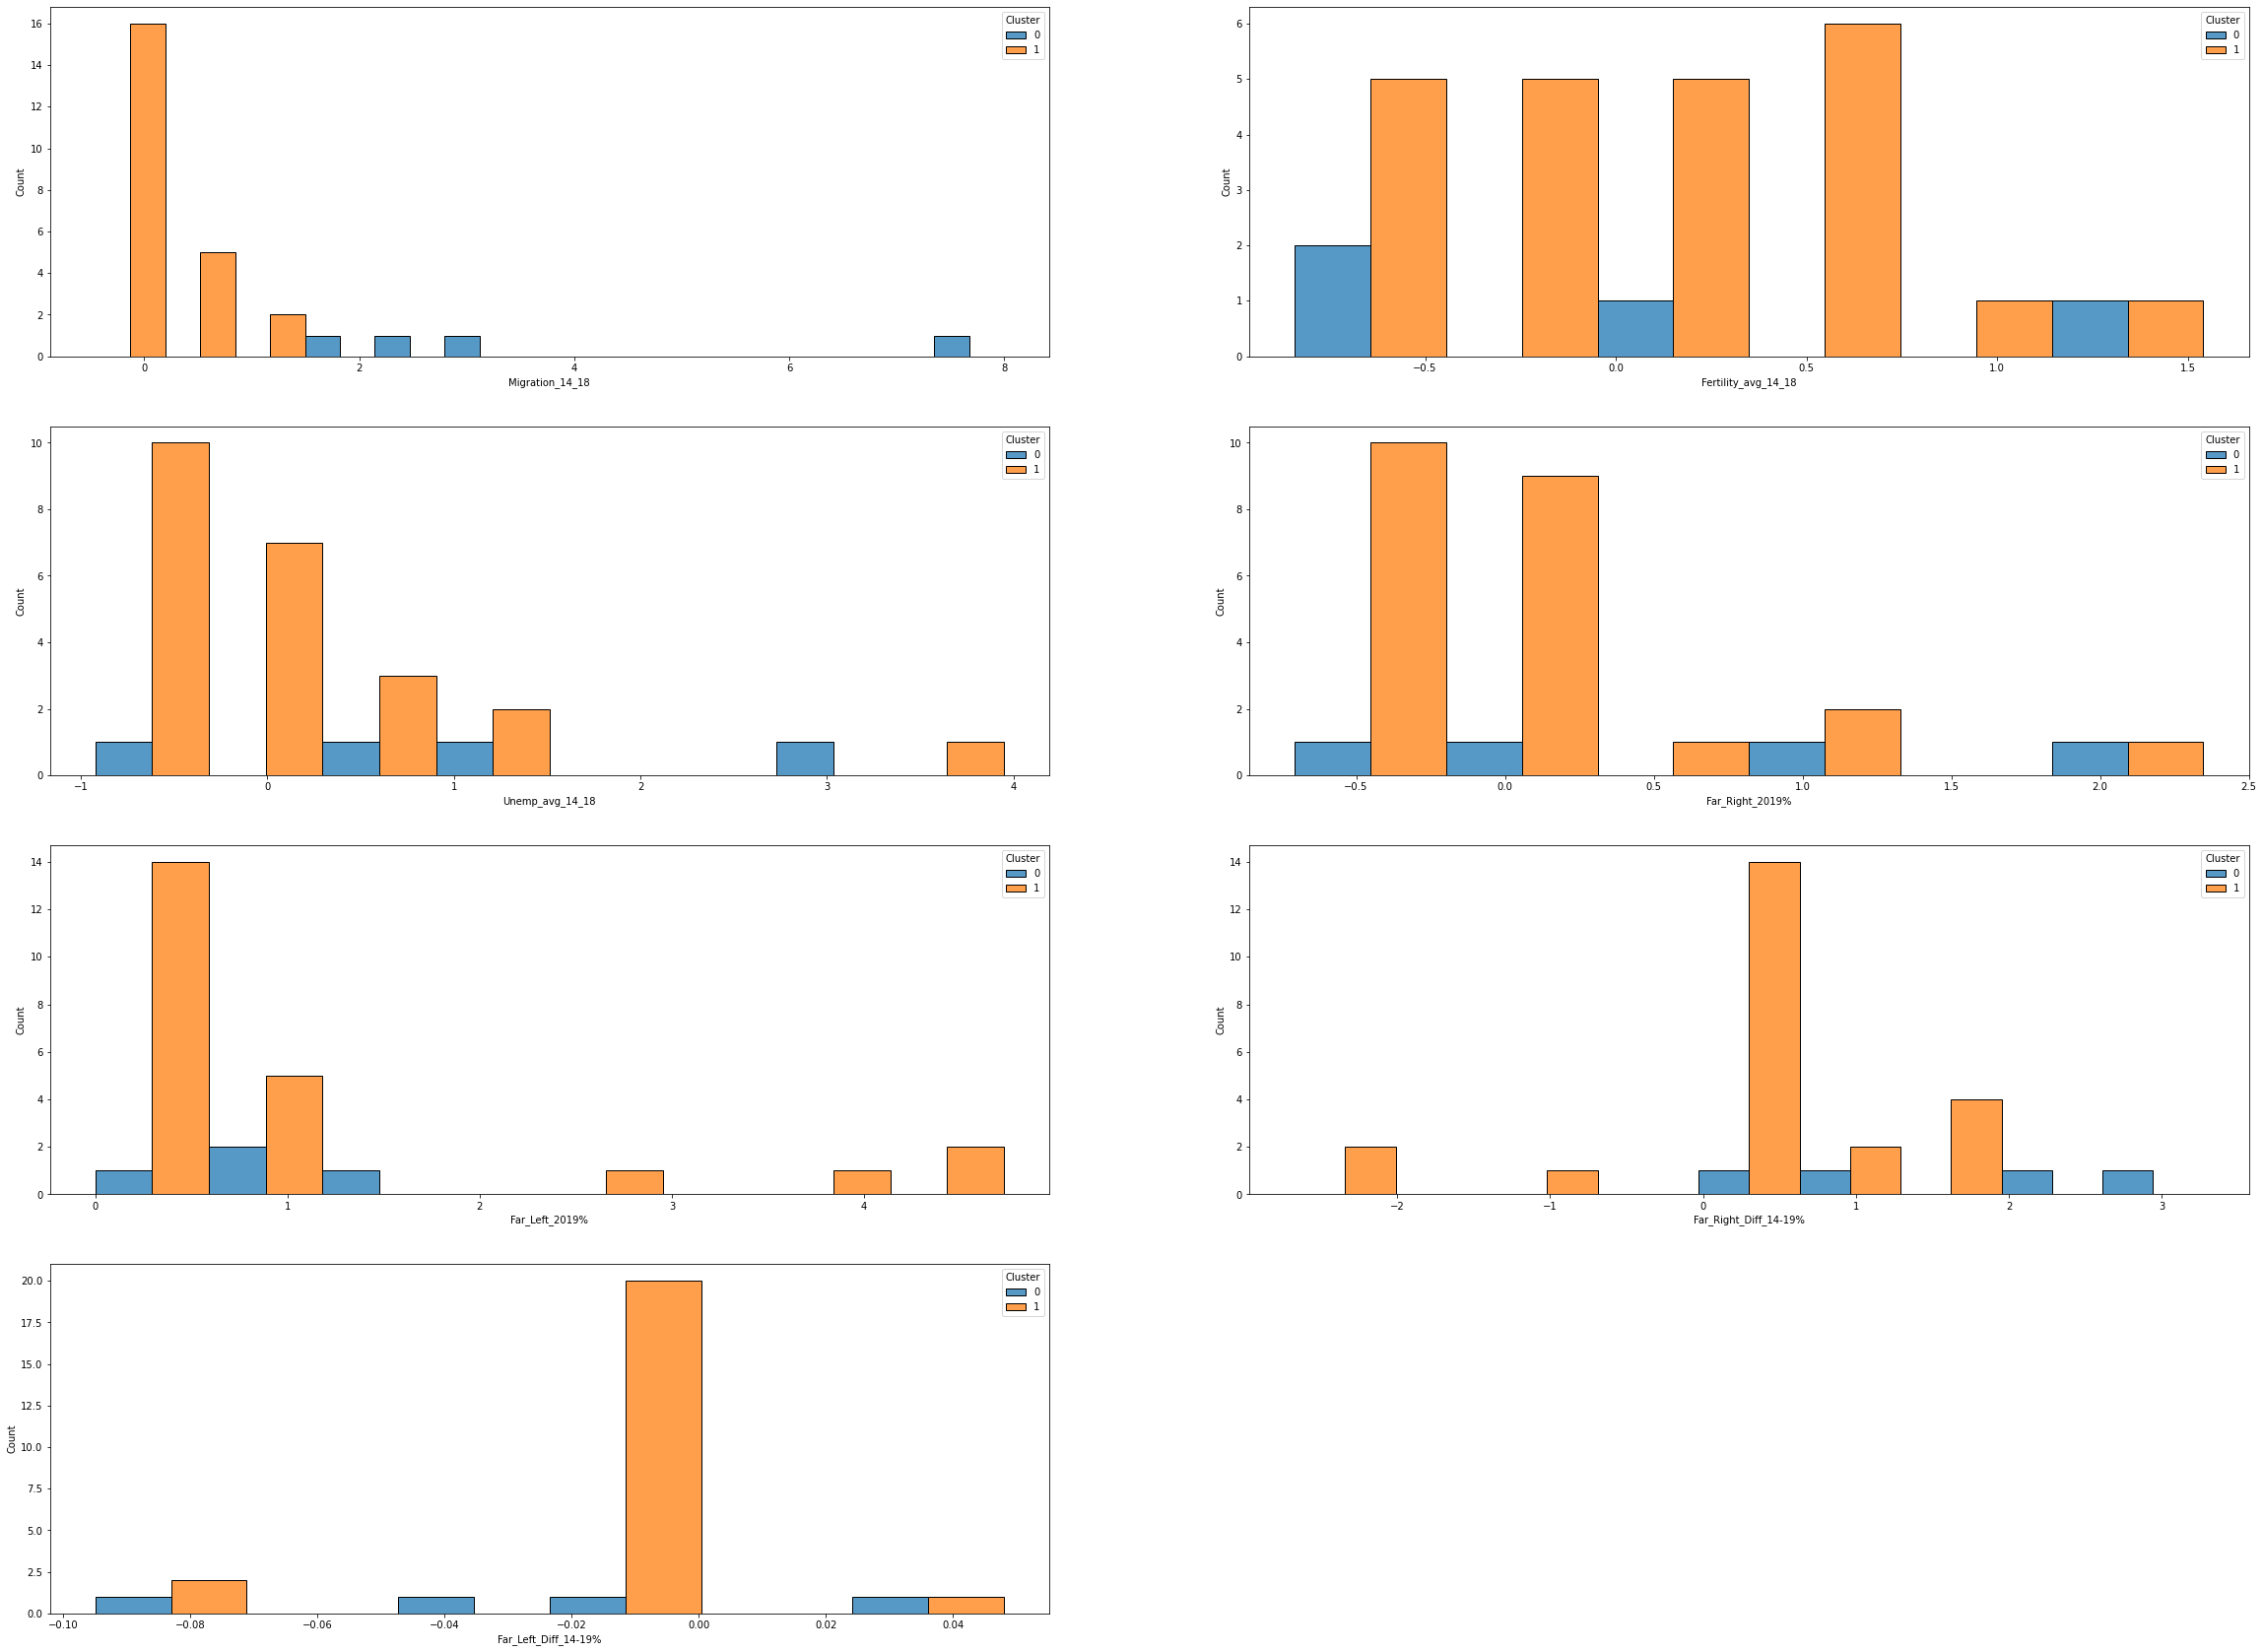

In [155]:
# plotting sub-plots to analyse the distribution of Donors Clusters
plt.figure(figsize=(40,30))

plt.subplot(4,2,1)
sns.histplot(x='Migration_14_18',   data=data_clusters_14_18, hue = "Cluster", multiple='dodge')

plt.subplot(4,2,2)
sns.histplot(x='Fertility_avg_14_18',   data=data_clusters_14_18, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,3)
sns.histplot(x='Unemp_avg_14_18',   data=data_clusters_14_18, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,4)
sns.histplot(x='Far_Right_2019%',   data=data_clusters_14_18, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,5)
sns.histplot(x='Far_Left_2019%',   data=data_clusters_14_18, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,6)
sns.histplot(x='Far_Right_Diff_14-19%',   data=data_clusters_14_18, hue = "Cluster", multiple='dodge')


plt.subplot(4,2,7)
sns.histplot(x='Far_Left_Diff_14-19%',   data=data_clusters_14_18, hue = "Cluster", multiple='dodge')

# New regression Analysis after clustering

In [156]:
from sklearn.preprocessing import MinMaxScaler

### 1 Period

In [157]:
#Fit, Tranform train
scaler = MinMaxScaler()
Period_09_13_S = scaler.fit_transform(Period_09_13) # this will return an array
#Convert the array to a pandas dataframe
Period_09_13_S = pd.DataFrame(Period_09_13_S, columns = Period_09_13.columns).set_index(Period_09_13.index)

In [158]:
data_clusters_14_18.head()

,Migration_14_18,Fertility_avg_14_18,Unemp_avg_14_18,Far_Right_2019%,Far_Left_2019%,Far_Right_Diff_14-19%,Far_Left_Diff_14-19%,Cluster
Country,,,,,,,,
Austria,0.501101,-0.153110,-0.545918,0.293413,0.000000,1.930636,0.000,1
Belgium,0.546911,0.583732,-0.025510,1.005988,0.623377,1.109827,0.048,1
Bulgaria,-0.304079,0.000000,0.061224,0.000000,0.000000,0.000000,0.000,1
Cyprus,-0.371059,-0.803828,1.285714,-0.706587,4.324675,0.000000,0.000,1
Croatia,-0.384909,-0.440191,1.423469,-0.161677,0.000000,0.000000,0.000,1


In [159]:
Period_09_13_S["Label"] = data_clusters_09_13["Cluster"]
Period_09_13_S

,Migration_09_13,Fertility_avg_09_13,Unemp_avg_09_13,Far_Right_2014%,Far_Left_2014%,Far_Right_Diff_09-14%,Far_Left_Diff_09-14%,Label
Country,,,,,,,,
Austria,0.159037,0.182584,0.000000,0.000000,0.000000,0.633333,0.307882,0
Belgium,0.205414,0.724719,0.169213,0.509383,0.000000,0.978571,0.307882,0
Bulgaria,0.006190,0.345506,0.337250,0.316354,0.000000,0.914286,0.307882,0
Cyprus,0.031625,0.129213,0.263220,0.000000,0.914835,0.633333,0.307882,0
Croatia,0.013073,0.306180,0.504113,0.243968,0.000000,0.652381,0.103448,0
Czechia,0.079109,0.244382,0.113984,0.383378,0.392857,0.000000,0.211823,0
Denmark,0.101474,0.665730,0.142186,0.825737,0.211538,1.000000,0.307882,0
Estonia,0.000000,0.455056,0.424207,0.000000,0.000000,0.633333,0.307882,0
Finland,0.051002,0.735955,0.179788,0.412869,0.211538,0.816667,0.497537,0


In [160]:
cluster_0_09_13 = Period_09_13_S[Period_09_13_S["Label"]==0]
cluster_1_09_13 = Period_09_13_S[Period_09_13_S["Label"]==1]

In [161]:
Y = cluster_0_09_13["Far_Right_2014%"]
X = cluster_0_09_13[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2014%   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.498
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.247
Time:                        15:58:39   Log-Likelihood:                -3.5876
No. Observations:                  24   AIC:                             13.18
Df Residuals:                      21   BIC:                             16.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0895      0.129     

In [162]:
Y = cluster_1_09_13["Far_Right_2014%"]
X = cluster_1_09_13[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2014%   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 29 Jan 2022   Prob (F-statistic):                nan
Time:                        15:58:39   Log-Likelihood:                 106.37
No. Observations:                   3   AIC:                            -206.7
Df Residuals:                       0   BIC:                            -209.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5151        inf     

In [163]:
Y = cluster_0_09_13["Far_Right_Diff_09-14%"]
X = cluster_0_09_13[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Far_Right_Diff_09-14%   R-squared:                       0.101
Model:                               OLS   Adj. R-squared:                  0.015
Method:                    Least Squares   F-statistic:                     1.177
Date:                   Sat, 29 Jan 2022   Prob (F-statistic):              0.328
Time:                           15:58:39   Log-Likelihood:                 5.9243
No. Observations:                     24   AIC:                            -5.849
Df Residuals:                         21   BIC:                            -2.314
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [164]:
Y = cluster_0_09_13["Far_Left_2014%"]
X = cluster_0_09_13[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2014%   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.1041
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.902
Time:                        15:58:39   Log-Likelihood:                 2.6995
No. Observations:                  24   AIC:                            0.6009
Df Residuals:                      21   BIC:                             4.135
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1626      0.099     

In [165]:
Y = cluster_1_09_13["Far_Left_2014%"]
X = cluster_1_09_13[["Migration_09_13",'Unemp_avg_09_13']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2014%   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 29 Jan 2022   Prob (F-statistic):                nan
Time:                        15:58:39   Log-Likelihood:                 104.00
No. Observations:                   3   AIC:                            -202.0
Df Residuals:                       0   BIC:                            -204.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5016        inf     

### 2 period

In [166]:
#Fit, Tranform 
scaler = MinMaxScaler()
Period_14_18_S = scaler.fit_transform(Period_14_18) # this will return an array
#Convert the array to a pandas dataframe
Period_14_18_S = pd.DataFrame(Period_14_18_S, columns = Period_14_18.columns).set_index(Period_14_18.index)

In [167]:
Period_14_18_S["Label"] = data_clusters_14_18["Cluster"]
Period_14_18_S

,Migration_14_18,Fertility_avg_14_18,Unemp_avg_14_18,Far_Right_2019%,Far_Left_2019%,Far_Right_Diff_14-19%,Far_Left_Diff_14-19%,Label
Country,,,,,,,,
Austria,0.113077,0.289157,0.077487,0.327451,0.000000,0.774319,0.664336,1
Belgium,0.118497,0.598394,0.184293,0.560784,0.131868,0.636187,1.000000,1
Bulgaria,0.017816,0.353414,0.202094,0.231373,0.000000,0.449416,0.664336,1
Cyprus,0.009892,0.016064,0.453403,0.000000,0.914835,0.449416,0.664336,1
Croatia,0.008253,0.168675,0.481675,0.178431,0.000000,0.449416,0.664336,1
Czechia,0.039309,0.457831,0.000000,0.558824,0.131868,0.725681,0.000000,1
Denmark,0.060816,0.666667,0.102618,0.150980,0.211538,0.000000,0.664336,1
Estonia,0.006617,0.413655,0.118325,0.327451,0.000000,0.774319,0.664336,1
Finland,0.023484,0.457831,0.236649,0.301961,0.211538,0.449416,0.664336,1


## OLS for Cluster 0 

### High unemployment rate, high far right and high migration

In [168]:
cluster_0 = Period_14_18_S[Period_14_18_S["Label"]==0]

In [169]:
Y = cluster_0["Far_Right_2019%"]
X = cluster_0[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2019%   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     2.899
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.384
Time:                        15:58:39   Log-Likelihood:                 2.9434
No. Observations:                   4   AIC:                            0.1132
Df Residuals:                       1   BIC:                            -1.728
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.4715      0.441     

In [170]:
cluster_1 = Period_14_18_S[Period_14_18_S["Label"]==1]

In [171]:
Y = cluster_1["Far_Right_2019%"]
X = cluster_1[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Far_Right_2019%   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2.771
Date:                Sat, 29 Jan 2022   Prob (F-statistic):             0.0866
Time:                        15:58:39   Log-Likelihood:                 2.6151
No. Observations:                  23   AIC:                            0.7697
Df Residuals:                      20   BIC:                             4.176
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1625      0.091     

In [172]:
Y = cluster_0["Far_Right_Diff_14-19%"]
X = cluster_0[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Far_Right_Diff_14-19%   R-squared:                       0.956
Model:                               OLS   Adj. R-squared:                  0.869
Method:                    Least Squares   F-statistic:                     10.94
Date:                   Sat, 29 Jan 2022   Prob (F-statistic):              0.209
Time:                           15:58:39   Log-Likelihood:                 6.9913
No. Observations:                      4   AIC:                            -7.983
Df Residuals:                          1   BIC:                            -9.824
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [173]:
Y = cluster_1["Far_Right_Diff_14-19%"]
X = cluster_1[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Far_Right_Diff_14-19%   R-squared:                       0.122
Model:                               OLS   Adj. R-squared:                  0.035
Method:                    Least Squares   F-statistic:                     1.394
Date:                   Sat, 29 Jan 2022   Prob (F-statistic):              0.271
Time:                           15:58:39   Log-Likelihood:                 7.9919
No. Observations:                     23   AIC:                            -9.984
Df Residuals:                         20   BIC:                            -6.577
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [174]:
Y = cluster_0["Far_Left_2019%"]
X = cluster_0[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2019%   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                 -0.716
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Sat, 29 Jan 2022   Prob (F-statistic):              0.756
Time:                        15:58:39   Log-Likelihood:                 4.2144
No. Observations:                   4   AIC:                            -2.429
Df Residuals:                       1   BIC:                            -4.270
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0812      0.321     

In [175]:
Y = cluster_1["Far_Left_2019%"]
X = cluster_1[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Far_Left_2019%   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     5.121
Date:                Sat, 29 Jan 2022   Prob (F-statistic):             0.0160
Time:                        15:58:39   Log-Likelihood:               -0.52620
No. Observations:                  23   AIC:                             7.052
Df Residuals:                      20   BIC:                             10.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0387      0.105     

In [176]:
Y = cluster_0["Far_Left_Diff_14-19%"]
X = cluster_0[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Far_Left_Diff_14-19%   R-squared:                       0.769
Model:                              OLS   Adj. R-squared:                  0.306
Method:                   Least Squares   F-statistic:                     1.662
Date:                  Sat, 29 Jan 2022   Prob (F-statistic):              0.481
Time:                          15:58:39   Log-Likelihood:                 2.0566
No. Observations:                     4   AIC:                             1.887
Df Residuals:                         1   BIC:                           0.04564
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.

In [177]:
Y = cluster_1["Far_Left_Diff_14-19%"]
X = cluster_1[["Migration_14_18",'Unemp_avg_14_18']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results= model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Far_Left_Diff_14-19%   R-squared:                       0.057
Model:                              OLS   Adj. R-squared:                 -0.038
Method:                   Least Squares   F-statistic:                    0.6021
Date:                  Sat, 29 Jan 2022   Prob (F-statistic):              0.557
Time:                          15:58:39   Log-Likelihood:                 6.5004
No. Observations:                    23   AIC:                            -7.001
Df Residuals:                        20   BIC:                            -3.594
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.